In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(suppress=True)

import os
import scanpy as sc
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

In [2]:
adata = sc.read_h5ad('./adata_meta.h5ad')
adata

AnnData object with n_obs × n_vars = 24885 × 3462
    obs: 'Timepoint', 'gfp_late', 'GFP', 'Tissue', 'Batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'label_full', 'label_red', 'clones', 'time_label_full', 'time_label_red', 'Meta clones', 'leiden', 'transferred_labels', 'prediction_score_max', 'dpt_pseudotime', 'def_lab'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'gene_removed'
    uns: 'Batch_colors', 'Timepoint_colors', 'def_lab_colors', 'diffmap_evals', 'final_lab_colors', 'hvg', 'iroot', 'label_full_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase_colors', 'pred_corr_colors', 'rank_genes_groups', 'transferred_labels_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'seurat'
    obsp: 'connectivities', 'distances'

In [5]:
print (adata[adata.obs['Timepoint'].values == 'Day3', :].shape[0])
print (adata[adata.obs['Timepoint'].values == 'Day10', :].shape[0])
print (adata[adata.obs['Timepoint'].values == 'Day17', :].shape[0])

6633
6942
11310


### Pre-processing and filtering

In [83]:
adata.obs['def_lab'] = adata.obs['def_lab'].astype('str')
adata.obs.loc[adata.obs['leiden'] == '7', 'def_lab'] = 'HSC/MPP 2'
adata.obs.loc[adata.obs['def_lab'] == 'HSC_MPP', 'def_lab'] = 'HSC/MPP 1'
adata.obs.loc[adata.obs['def_lab'] == 'DC precursor ', 'def_lab'] = 'DC precursor'

In [84]:
data = pd.read_pickle('./CordBlood_Obs_Clones.pkl')
info = data[data.columns[:14]]
clones = data[data.columns[14:]]
clones = clones.fillna(0)
clones = clones.loc[adata.obs_names].copy()

In [85]:
clones

Clone_1  Clone_2  Clone_3  Clone_4  Clone_5  Clone_6  \
SITTG7AAATGGACAAATTGGA      0.0      0.0      0.0      0.0      0.0      0.0   
SITTG7AAAGTGAAGACATAGT      0.0      0.0      0.0      0.0      0.0      0.0   
SITTG7AACCCAAAGGCTGGAT      0.0      0.0      0.0      0.0      0.0      0.0   
SITTG7AAAGGATTCATCTATC      0.0      0.0      0.0      0.0      0.0      0.0   
SITTG7AAAGGGCGTTGTACGT      0.0      0.0      0.0      0.0      0.0      0.0   
...                         ...      ...      ...      ...      ...      ...   
SITTB9TTTGACTAGTGGCCTC      0.0      0.0      0.0      0.0      0.0      0.0   
SITTB9TTTGGTTCACTTTATC      0.0      0.0      0.0      0.0      0.0      0.0   
SITTB9TTTGTTGTCCACTGGG      0.0      0.0      0.0      0.0      0.0      0.0   
SITTB9TTTCCTCGTGACCGAA      0.0      0.0      0.0      0.0      0.0      0.0   
SITTB9TTTGTTGTCGAGGCAA      0.0      0.0      0.0      0.0      0.0      0.0   

                        Clone_7  Clone_8  Clone_9  Clone_10  ...  Clone_3931  \
SITTG7AAATGGACAAATTGGA      0.0      0.0      0.0       0.0  ...         0.0   
SITTG7AAAGTGAAGACATAGT      0.0      0.0      0.0       0.0  ...         0.0   
SITTG7AACCCAAAGGCTGGAT      0.0      0.0      0.0       0.0  ...         0.0   
SITTG7AAAGGATTCATCTATC      0.0      0.0      0.0       0.0  ...         0.0   
SITTG7AAAGGGCGTTGTACGT      0.0      0.0      0.0       0.0  ...         0.0   
...                         ...      ...      ...       ...  ...         ...   
SITTB9TTTGACTAGTGGCCTC      0.0      0.0      0.0       0.0  ...         0.0   
SITTB9TTTGGTTCACTTTATC      0.0      0.0      0.0       0.0  ...         0.0   
SITTB9TTTGTTGTCCACTGGG      0.0      0.0      0.0       0.0  ...         0.0   
SITTB9TTTCCTCGTGACCGAA      0.0      0.0      0.0       0.0  ...         0.0   
SITTB9TTTGTTGTCGAGGCAA      0.0      0.0      0.0       0.0  ...         0.0   

                        Clone_3932  Clone_3933  Clone_3934  Clone_3935  \
SITTG7AAATGGACAAATTGGA         0.0         0.0         0.0         0.0   
SITTG7AAAGTGAAGACATAGT         0.0         0.0         0.0         0.0   
SITTG7AACCCAAAGGCTGGAT         0.0         0.0         0.0         0.0   
SITTG7AAAGGATTCATCTATC         0.0         0.0         0.0         0.0   
SITTG7AAAGGGCGTTGTACGT         0.0         0.0         0.0         0.0   
...                            ...         ...         ...         ...   
SITTB9TTTGACTAGTGGCCTC         0.0         0.0         0.0         0.0   
SITTB9TTTGGTTCACTTTATC         0.0         0.0         0.0         0.0   
SITTB9TTTGTTGTCCACTGGG         0.0         0.0         0.0         0.0   
SITTB9TTTCCTCGTGACCGAA         0.0         0.0         0.0         0.0   
SITTB9TTTGTTGTCGAGGCAA         0.0         0.0         0.0         0.0   

                        Clone_3936  Clone_3937  Clone_3938  Clone_3939  \
SITTG7AAATGGACAAATTGGA         0.0         0.0         0.0         0.0   
SITTG7AAAGTGAAGACATAGT         0.0         0.0         0.0         0.0   
SITTG7AACCCAAAGGCTGGAT         0.0         0.0         0.0         0.0   
SITTG7AAAGGATTCATCTATC         0.0         0.0         0.0         0.0   
SITTG7AAAGGGCGTTGTACGT         0.0         0.0         0.0         0.0   
...                            ...         ...         ...         ...   
SITTB9TTTGACTAGTGGCCTC         0.0         0.0         0.0         0.0   
SITTB9TTTGGTTCACTTTATC         0.0         0.0         0.0         0.0   
SITTB9TTTGTTGTCCACTGGG         0.0         0.0         0.0         0.0   
SITTB9TTTCCTCGTGACCGAA         0.0         0.0         0.0         0.0   
SITTB9TTTGTTGTCGAGGCAA         0.0         0.0         0.0         0.0   

                        Clone_3940  
SITTG7AAATGGACAAATTGGA         0.0  
SITTG7AAAGTGAAGACATAGT         0.0  
SITTG7AACCCAAAGGCTGGAT         0.0  
SITTG7AAAGGATTCATCTATC         0.0  
SITTG7AAAGGGCGTTGTACGT         0.0  
...                            ...  
SITTB9TTTGACTAGTGGCCTC         0.0  
SITTB9TTTGGTTCACTTTATC      

In [86]:
adata.obs['Timepoint'] = adata.obs['Timepoint'].astype('str')
adata.obs['time_label_full'] = adata.obs['Timepoint'] + '_' + adata.obs['def_lab']

index = ['Clone_'  + str(np.where(row != 0)[0] + 1)[1:-1] for idx, row in clones.iterrows()]
adata.obs['clones'] = index

In [87]:
rename_cell = adata.obs[adata.obs['time_label_full'] == 'Day17_HSC/MPP 1']

adata.obs.loc[rename_cell.index, 'def_lab'] = rename_cell['transferred_labels'].values
adata.obs.loc[adata.obs['def_lab'] == 'DC2', 'def_lab'] = 'DC'
adata.obs['time_label_full'] = adata.obs['Timepoint'] + '_' + adata.obs['def_lab']

In [88]:
adata.obs

Timepoint gfp_late   GFP     Tissue  \
SITTG7AAATGGACAAATTGGA      Day3           GFP+  CB_HDBI58   
SITTG7AAAGTGAAGACATAGT      Day3           GFP+  CB_HDBI58   
SITTG7AACCCAAAGGCTGGAT      Day3           GFP+  CB_HDBI58   
SITTG7AAAGGATTCATCTATC      Day3           GFP+  CB_HDBI58   
SITTG7AAAGGGCGTTGTACGT      Day3           GFP+  CB_HDBI58   
...                          ...      ...   ...        ...   
SITTB9TTTGACTAGTGGCCTC     Day17      mid  GFP+  CB_HDBI58   
SITTB9TTTGGTTCACTTTATC     Day17      mid  GFP+  CB_HDBI58   
SITTB9TTTGTTGTCCACTGGG     Day17      mid  GFP+  CB_HDBI58   
SITTB9TTTCCTCGTGACCGAA     Day17      mid  GFP+  CB_HDBI58   
SITTB9TTTGTTGTCGAGGCAA     Day17      mid  GFP+  CB_HDBI58   

                                          Batch  n_genes_by_counts  \
SITTG7AAATGGACAAATTGGA      CB_HDBI58_Day3_GFP+               5813   
SITTG7AAAGTGAAGACATAGT      CB_HDBI58_Day3_GFP+               3193   
SITTG7AACCCAAAGGCTGGAT      CB_HDBI58_Day3_GFP+               4508   
SITTG7AAAGGATTCATCTATC      CB_HDBI58_Day3_GFP+               3854   
SITTG7AAAGGGCGTTGTACGT      CB_HDBI58_Day3_GFP+               4663   
...                                         ...                ...   
SITTB9TTTGACTAGTGGCCTC  CB_HDBI58_Day17_GFP+mid               2244   
SITTB9TTTGGTTCACTTTATC  CB_HDBI58_Day17_GFP+mid               2474   
SITTB9TTTGTTGTCCACTGGG  CB_HDBI58_Day17_GFP+mid               2575   
SITTB9TTTCCTCGTGACCGAA  CB_HDBI58_Day17_GFP+mid               1396   
SITTB9TTTGTTGTCGAGGCAA  CB_HDBI58_Day17_GFP+mid               2578   

                        total_counts  total_counts_mt  pct_counts_mt  \
SITTG7AAATGGACAAATTGGA       43313.0           1398.0       3.227668   
SITTG7AAAGTGAAGACATAGT       13605.0            692.0       5.086365   
SITTG7AACCCAAAGGCTGGAT       26535.0           1120.0       4.220840   
SITTG7AAAGGATTCATCTATC       16681.0            863.0       5.173551   
SITTG7AAAGGGCGTTGTACGT       26970.0           1517.0       5.624768   
...                              ...              ...            ...   
SITTB9TTTGACTAGTGGCCTC       15068.0            404.0       2.681179   
SITTB9TTTGGTTCACTTTATC        5719.0            416.0       7.273999   
SITTB9TTTGTTGTCCACTGGG        8349.0            319.0       3.820817   
SITTB9TTTCCTCGTGACCGAA        3517.0            213.0       6.056298   
SITTB9TTTGTTGTCGAGGCAA        9482.0            654.0       6.897279   

                         S_score  ...  label_red      clones  \
SITTG7AAATGGACAAATTGGA  0.007405  ...       MEMP  Clone_3465   
SITTG7AAAGTGAAGACATAGT -0.167302  ...  Mast cell  Clone_3905   
SITTG7AACCCAAAGGCTGGAT -0.048952  ...       MEMP  Clone_1449   
SITTG7AAAGGATTCATCTATC -0.153677  ...    HSC_MPP  Clone_3320   
SITTG7AAAGGGCGTTGTACGT  0.010442  ...  Erythroid      Clone_   
...                          ...  ...        ...         ...   
SITTB9TTTGACTAGTGGCCTC -0.082700  ...  Erythroid  Clone_1964   
SITTB9TTTGGTTCACTTTATC -0.210080  ...  Mast cell      Clone_   
SITTB9TTTGTTGTCCACTGGG -0.208050  ...   Monocyte      Clone_   
SITTB9TTTCCTCGTGACCGAA -0.207592  ...   Monocyte  Clone_2672   
SITTB9TTTGTTGTCGAGGCAA -0.091091  ...   Monocyte   Clone_418   

                             time_label_full   time_label_red Meta clones  \
SITTG7AAATGGACAAATTGGA             Day3_MEMP        Day3_MEMP        -1.0   
SITTG7AAAGTGAAGACATAGT        Day3_Mast cell   Day3_Mast cell        -1.0   
SITTG7AACCCAAAGGCTGGAT             Day3_MEMP        Day3_MEMP        -1.0   
SITTG7AAAGGATTCATCTATC              Day3_NMP     Day3_HSC_MPP        -1.0   
SITTG7AAAGGGCGTTGTACGT             Day3_MEMP   Day3_Erythroid        -1.0   
...                                      ...              ...         ...   
SITTB9TTTGACTAGTGGCCTC  Day17_Late Erythroid  Day17_Erythroid           5   
SITTB9TTTGGTTCACTTTATC       Day17_Mast cell  Day17_Mast cell        -1.0   
SITTB9TTTGTTGTCCACTGGG        Day17_Monocyte   Day17_Monocyte        -1.0   
SITTB9TTTCCTCGTGACCGAA        Day

In [89]:
adata_pos = adata[adata.obs['GFP'] == 'GFP+', :]
adata_neg = adata[adata.obs['GFP'] == 'GFP-', :]
adata_pos_barcode = adata_pos[[item != 'Clone_' for item in list(adata_pos.obs['clones'])], :]

print (adata_pos.shape, adata_neg.shape, adata_pos_barcode.shape)

(16845, 3462) (8040, 3462) (14133, 3462)


### Analysis of clonal info

In [90]:
mat = clones.loc[adata_pos_barcode.obs.index.intersection(clones.index)]
mat['time_label_full'] = adata_pos_barcode.obs['time_label_full']
mat.shape

(14133, 3941)

In [91]:
mat = mat.groupby('time_label_full').sum().T
mat.columns.name = ''
mat

Day10_DC  Day10_DC precursor  Day10_Early Erythroid  \
Clone_1          0.0                 0.0                    1.0   
Clone_2          0.0                 0.0                    0.0   
Clone_3          0.0                 0.0                    1.0   
Clone_4          0.0                 0.0                    1.0   
Clone_5          0.0                 0.0                    0.0   
...              ...                 ...                    ...   
Clone_3936       0.0                 0.0                    0.0   
Clone_3937       0.0                 0.0                    0.0   
Clone_3938       0.0                 0.0                    0.0   
Clone_3939       0.0                 0.0                    0.0   
Clone_3940       0.0                 0.0                    0.0   

            Day10_HSC/MPP 1  Day10_HSC/MPP 2  Day10_Late Erythroid  \
Clone_1                 0.0              0.0                   0.0   
Clone_2                 0.0              0.0                   0.0   
Clone_3                 0.0              0.0                   0.0   
Clone_4                 0.0              0.0                   0.0   
Clone_5                 0.0              0.0                   0.0   
...                     ...              ...                   ...   
Clone_3936              0.0              0.0                   0.0   
Clone_3937              0.0              0.0                   0.0   
Clone_3938              0.0              0.0                   0.0   
Clone_3939              0.0              0.0                   0.0   
Clone_3940              0.0              0.0                   0.0   

            Day10_MEMP  Day10_Mast cell  Day10_Mid Erythroid  \
Clone_1            0.0              0.0                  5.0   
Clone_2            0.0              0.0                  0.0   
Clone_3            0.0              0.0                  3.0   
Clone_4            0.0              0.0                  0.0   
Clone_5            0.0              0.0                  0.0   
...                ...              ...                  ...   
Clone_3936         0.0              0.0                  0.0   
Clone_3937         0.0              0.0                  0.0   
Clone_3938         0.0              0.0                  0.0   
Clone_3939         0.0              0.0                  0.0   
Clone_3940         0.0              0.0                  0.0   

            Day10_Mono precur  ...  Day3_DC  Day3_DC precursor  \
Clone_1                   0.0  ...      0.0                0.0   
Clone_2                   0.0  ...      0.0                0.0   
Clone_3                   0.0  ...      0.0                0.0   
Clone_4                   0.0  ...      0.0                0.0   
Clone_5                   0.0  ...      0.0                0.0   
...                       ...  ...      ...                ...   
Clone_3936                0.0  ...      0.0                0.0   
Clone_3937                0.0  ...      0.0                0.0   
Clone_3938                0.0  ...      0.0                0.0   
Clone_3939                0.0  ...      0.0                0.0   
Clone_3940                0.0  ...      0.0                0.0   

            Day3_Early Erythroid  Day3_HSC/MPP 1  Day3_HSC/MPP 2  Day3_MEMP  \
Clone_1                      0.0             0.0             0.0        0.0   
Clone_2                      0.0             0.0             0.0        0.0   
Clone_3                      0.0             0.0             0.0        0.0   
Clone_4                      0.0             0.0             0.0        0.0   
Clone_5                      0.0             0.0             0.0        0.0   
...                          ...             ...             ...        ...   
Clone_3936                   0.0             0.0             0.0        1.0   
Clone_3937                   0.0             0.0             0.0        0.0   
Clone_3938                   0.0             0.0             0.0        3.0   
Clone_3939    

In [92]:
print (mat[[i for i in mat.columns if i.startswith('Day3')]].sum().sum())
print (adata_pos[adata_pos.obs['Timepoint'].values == 'Day3', :].shape[0])
print (mat[[i for i in mat.columns if i.startswith('Day10')]].sum().sum())
print (adata_pos[adata_pos.obs['Timepoint'].values == 'Day10', :].shape[0])
print (mat[[i for i in mat.columns if i.startswith('Day17')]].sum().sum())
print (adata_pos[adata_pos.obs['Timepoint'].values == 'Day17', :].shape[0])

2482.0
2708
2578.0
2827
9073.0
11310


In [93]:
mat = sc.AnnData(mat)
sc.pp.filter_cells(mat, min_counts=3)
sc.pp.filter_genes(mat, min_counts=1)
mat

AnnData object with n_obs × n_vars = 606 × 31
    obs: 'n_counts'
    var: 'n_counts'

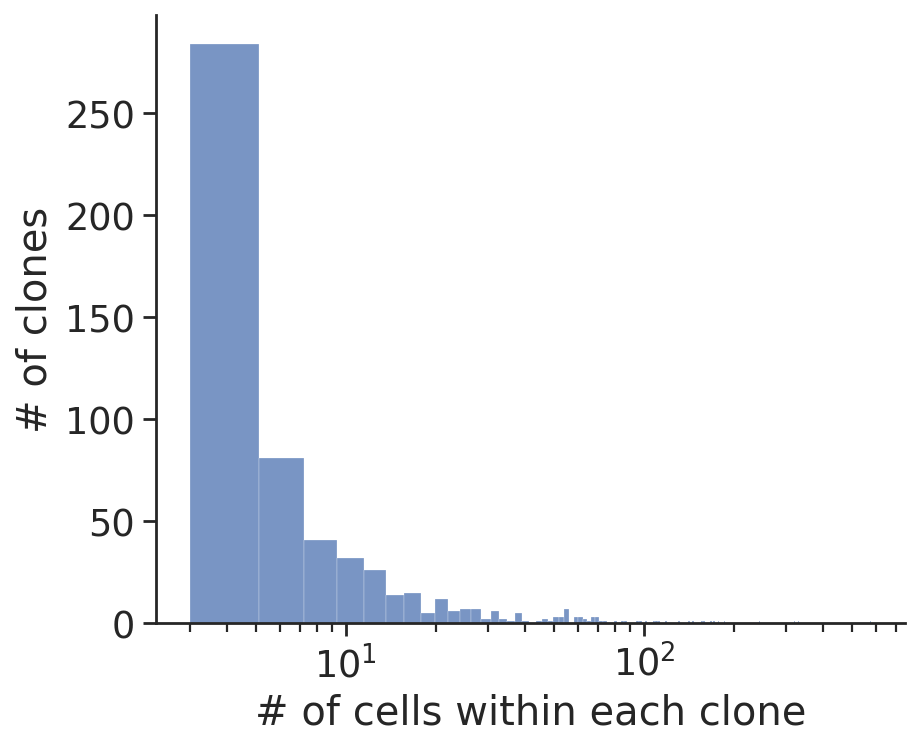

In [94]:
sns.set_theme(style='ticks', font_scale=1.5)
ax = sns.histplot(mat.obs.n_counts.values)
plt.xscale('log')
plt.xlabel('# of cells within each clone', fontsize=18)
plt.ylabel('# of clones', fontsize=18)
ax.spines[['right', 'top']].set_visible(False)
plt.savefig('./figures/cellnumber.svg', dpi=600, bbox_inches='tight', transparent=True)

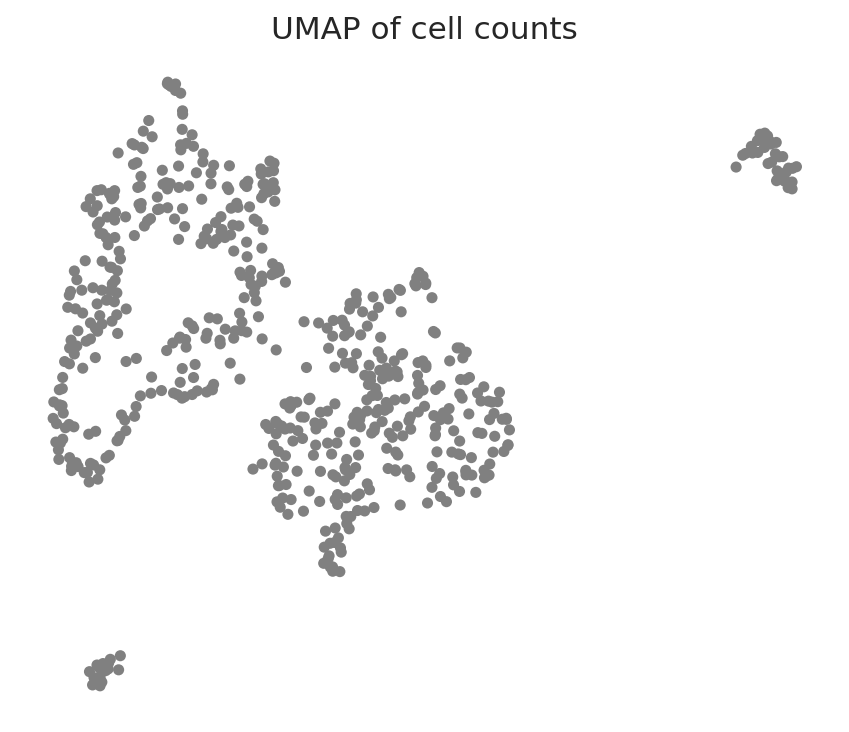

In [95]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(6, 5), transparent=True)
sc.tl.pca(mat)
sc.pp.neighbors(mat, n_neighbors=15)
sc.tl.umap(mat)
sc.pl.scatter(mat, basis='umap', save='umap', frameon=False, size=100, title='UMAP of cell counts')

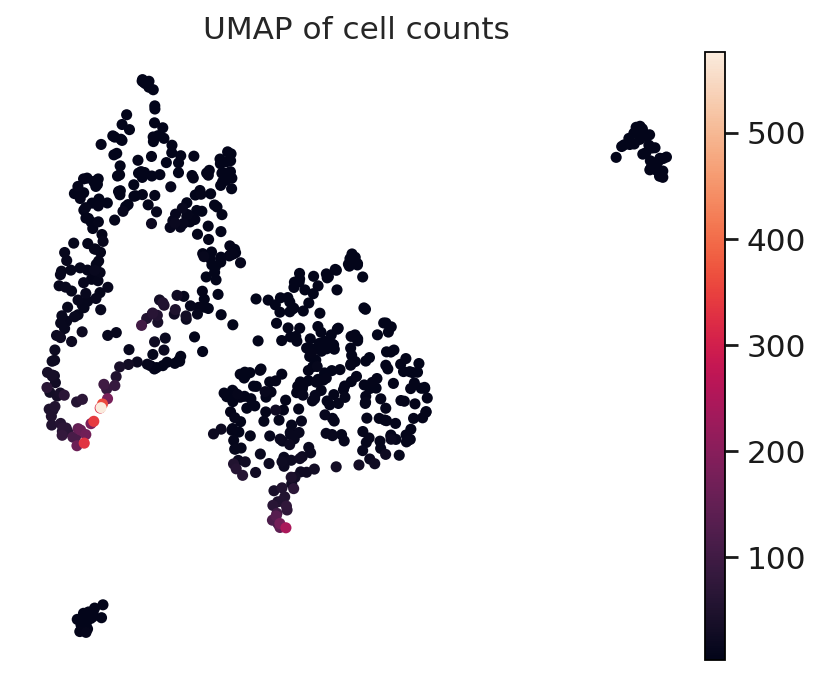

In [96]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(6, 5), transparent=True)
sc.pl.umap(mat, color='n_counts', legend_loc='right margin', save='n_counts', frameon=False, size=100, title='UMAP of cell counts')

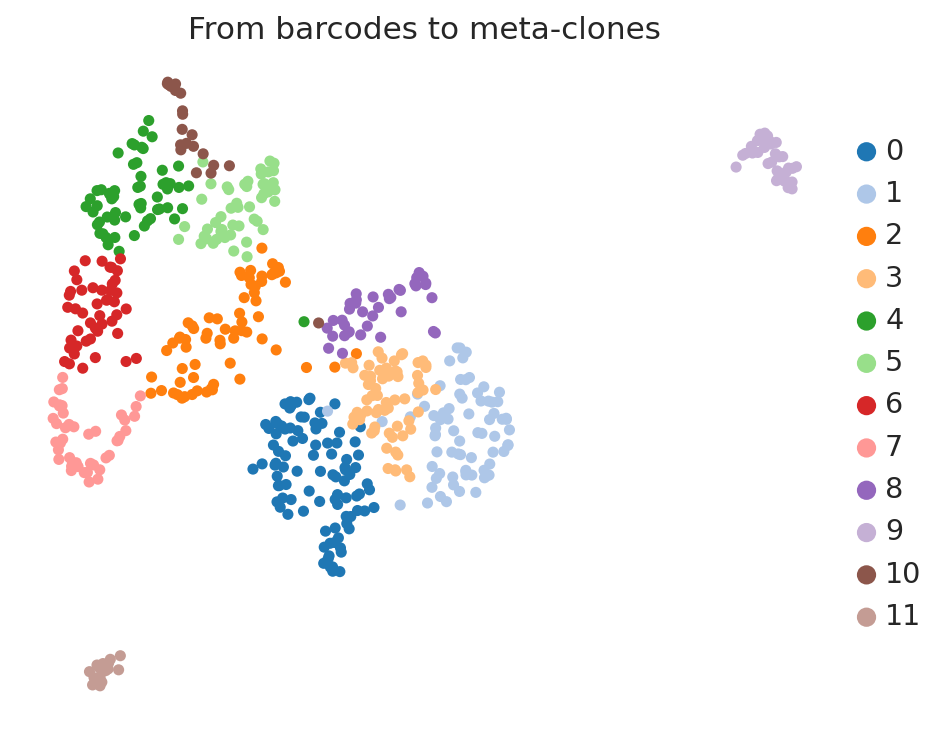

In [97]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(6, 5), transparent=True)
sc.tl.leiden(mat, resolution=1)
sc.pl.scatter(
    mat, basis='umap', color='leiden', 
    legend_loc='right margin', size=100, save='leiden.svg', 
    title='From barcodes to meta-clones', frameon=False, palette=sns.color_palette('tab20')
)

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


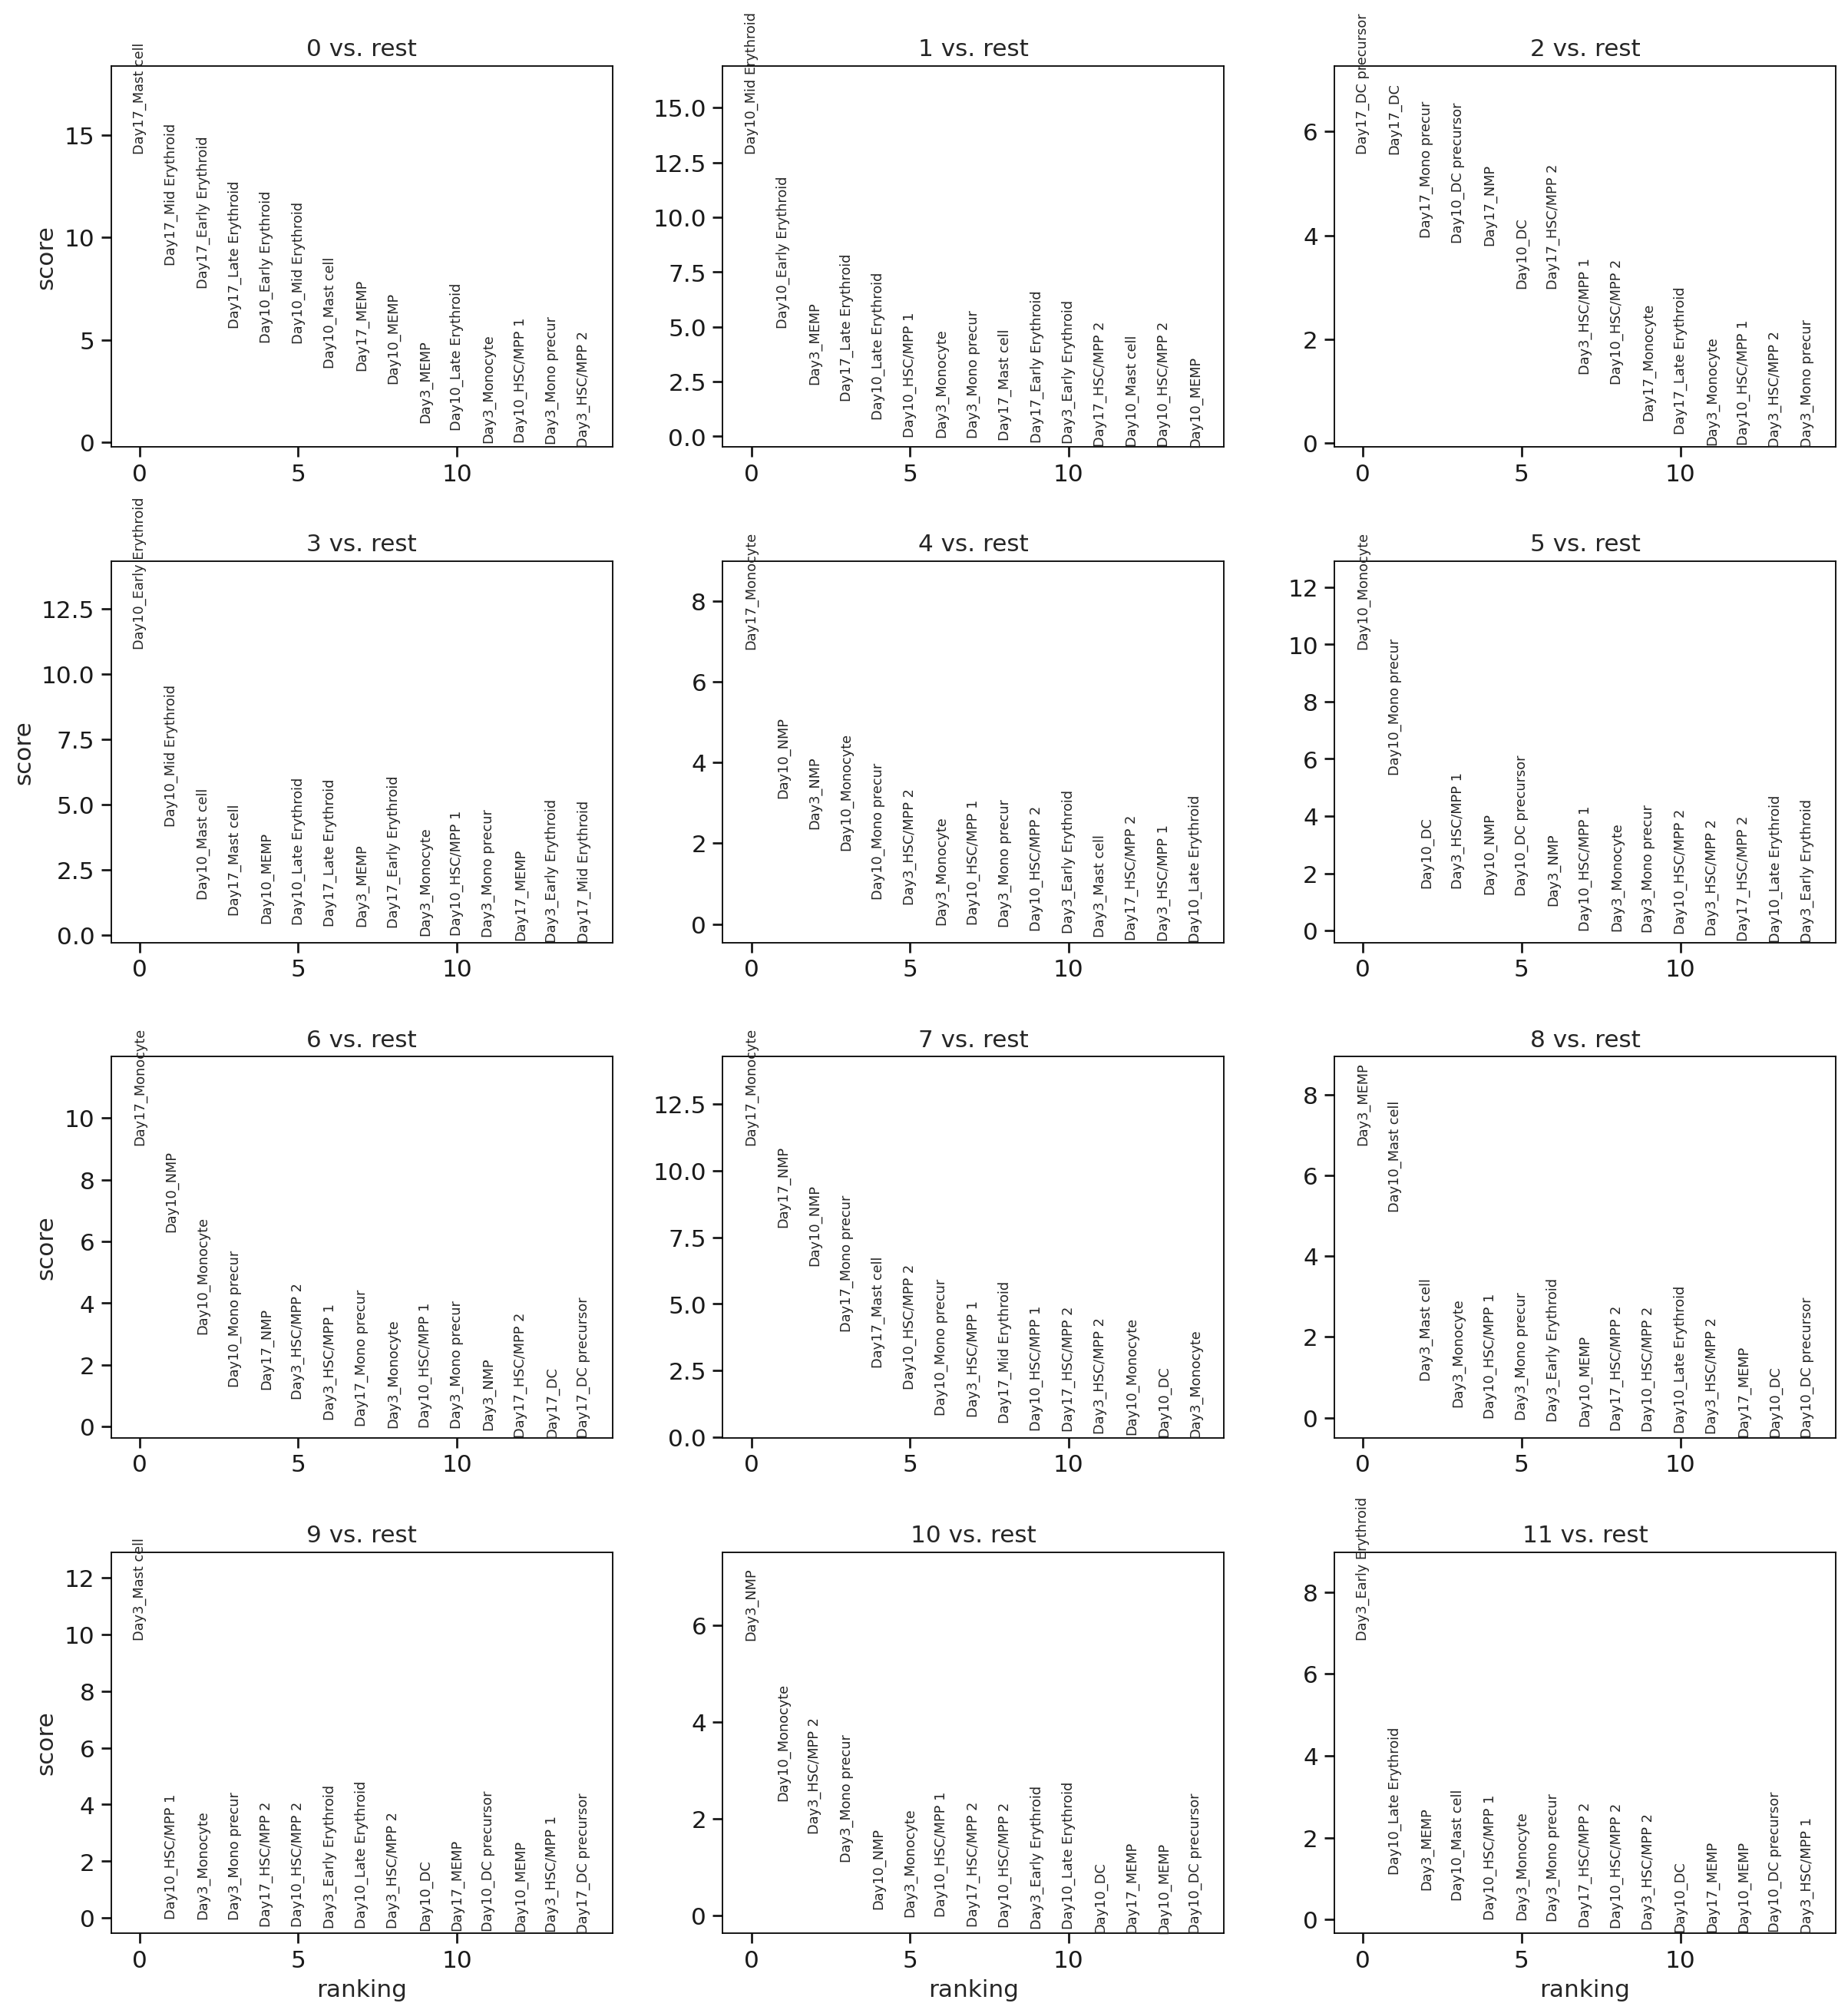

In [98]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(6, 5), transparent=True)
plt.rcParams['axes.grid'] = False
sc.tl.rank_genes_groups(mat, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(mat, n_genes=15, sharey=False, save='wilcoxon.svg', ncols=3, sharex=True)

In [19]:
mat.obs.leiden.value_counts()

leiden
0     94
1     73
2     66
3     66
4     58
5     49
6     46
7     44
8     39
9     34
10    21
11    16
Name: count, dtype: int64

In [20]:
len(set(adata.obs['clones']))

3247

### Descriptions of datasets

In [21]:
del adata.uns['def_lab_colors']

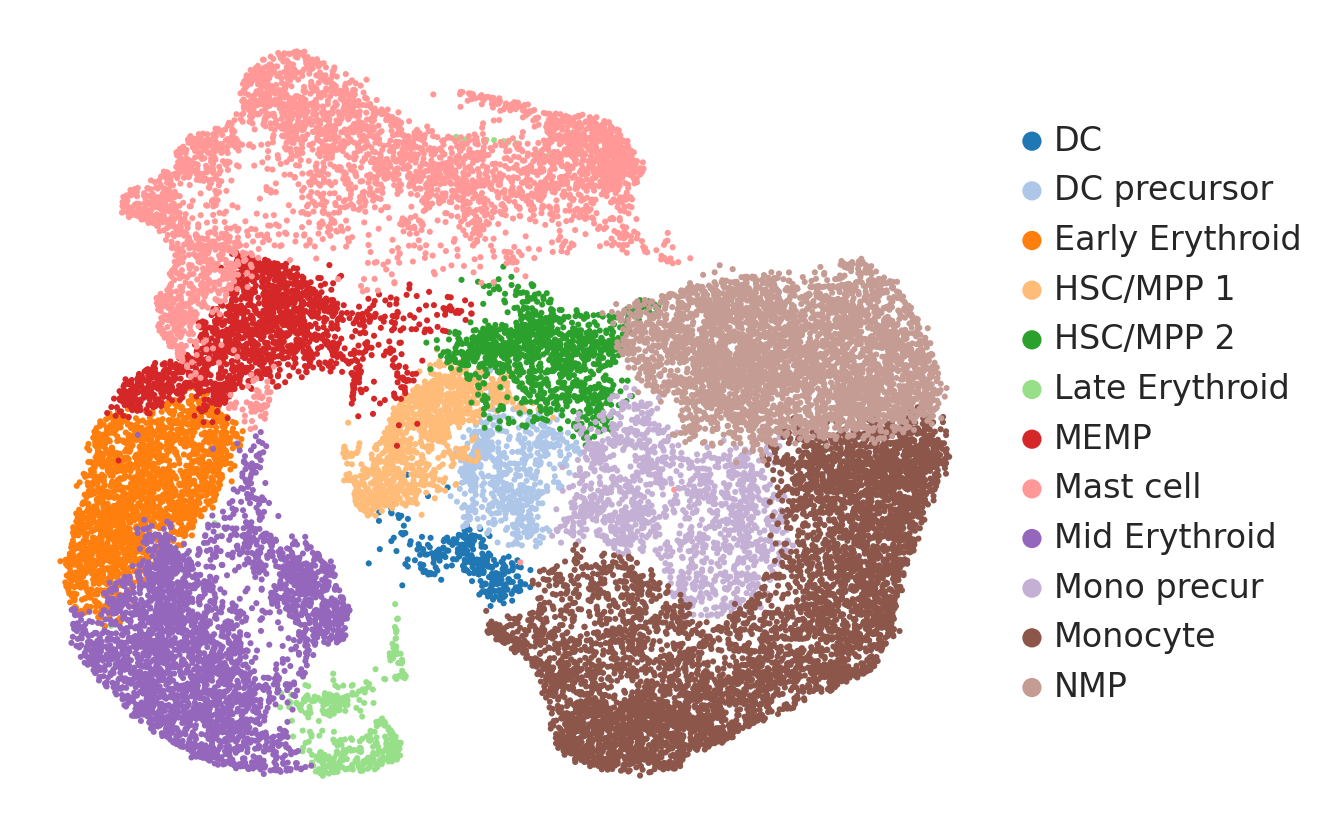

In [22]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(7, 6), transparent=True)
sc.pl.scatter(adata, basis='umap', color='def_lab', 
              legend_loc='right margin', palette=sns.color_palette('tab20'),
              save='def_lab.svg', size=30, frameon=False, title='',
              legend_fontsize=15)

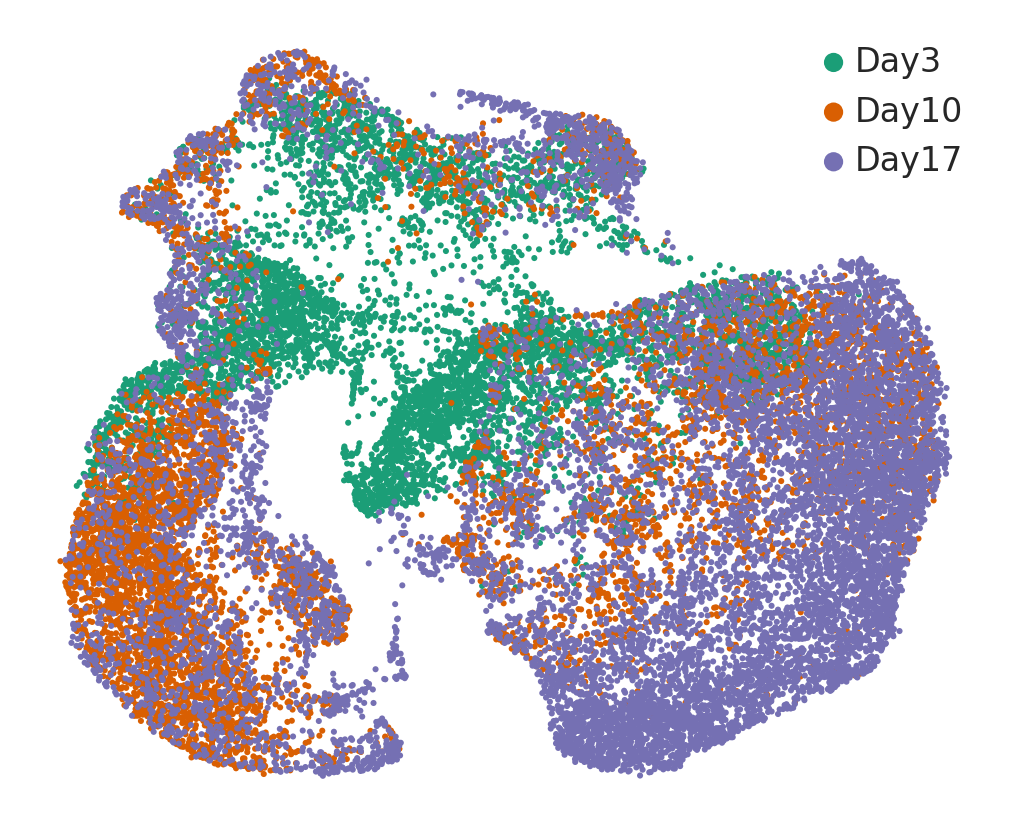

In [23]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(7, 6), transparent=True)
sc.pl.scatter(adata, basis='umap', color='Timepoint', 
              legend_loc='best', palette=sns.color_palette('Dark2'), 
              save='timepoints.svg', size=30, frameon=False, title='',
              legend_fontsize=15)

In [24]:
adata_clones_filter = adata_pos_barcode[[i in list(mat.obs.index) for i in adata_pos_barcode.obs['clones'].values], :]
adata_clones_filter

View of AnnData object with n_obs × n_vars = 11064 × 3462
    obs: 'Timepoint', 'gfp_late', 'GFP', 'Tissue', 'Batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'label_full', 'label_red', 'clones', 'time_label_full', 'time_label_red', 'Meta clones', 'leiden', 'transferred_labels', 'prediction_score_max', 'dpt_pseudotime', 'def_lab'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'gene_removed'
    uns: 'Batch_colors', 'Timepoint_colors', 'diffmap_evals', 'final_lab_colors', 'hvg', 'iroot', 'label_full_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase_colors', 'pred_corr_colors', 'rank_genes_groups', 'transferred_labels_colors', 'umap', 'def_lab_colors'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'seurat'
    obsp: 'connectivities', 'distances'

In [25]:
leiden = []
for clone in adata_clones_filter.obs['clones'].values:
    leiden.append(mat.obs.loc[clone]['leiden'])
adata_clones_filter.obs['Meta clones'] = leiden

/tmp/ipykernel_260956/3558894307.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_clones_filter.obs['Meta clones'] = leiden


In [26]:
adata.obs['Meta clones'] = np.zeros(adata.shape[0]) - 1
for i in list(adata_clones_filter.obs.index):
    adata.obs.at[i, 'Meta clones'] = adata_clones_filter.obs.loc[i]['Meta clones']
adata.obs['Meta clones'] = [str(i) for i in adata.obs['Meta clones']]

/tmp/ipykernel_260956/976811526.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  adata.obs.at[i, 'Meta clones'] = adata_clones_filter.obs.loc[i]['Meta clones']


In [28]:
adata.write('./adata_update.h5ad')

In [7]:
import scanpy as sc
import seaborn as sns
import pandas as pd
adata = sc.read_h5ad('./adata_update.h5ad')
adata

AnnData object with n_obs × n_vars = 24885 × 3462
    obs: 'Timepoint', 'gfp_late', 'GFP', 'Tissue', 'Batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'label_full', 'label_red', 'clones', 'time_label_full', 'time_label_red', 'Meta clones', 'leiden', 'transferred_labels', 'prediction_score_max', 'dpt_pseudotime', 'def_lab'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'gene_removed'
    uns: 'Batch_colors', 'Timepoint_colors', 'def_lab_colors', 'diffmap_evals', 'final_lab_colors', 'hvg', 'iroot', 'label_full_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase_colors', 'pred_corr_colors', 'rank_genes_groups', 'transferred_labels_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'seurat'
    obsp: 'connectivities', 'distances'

In [8]:
group_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
adata.obs['group'] = pd.Categorical(adata.obs['Meta clones'], categories=group_labels)

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


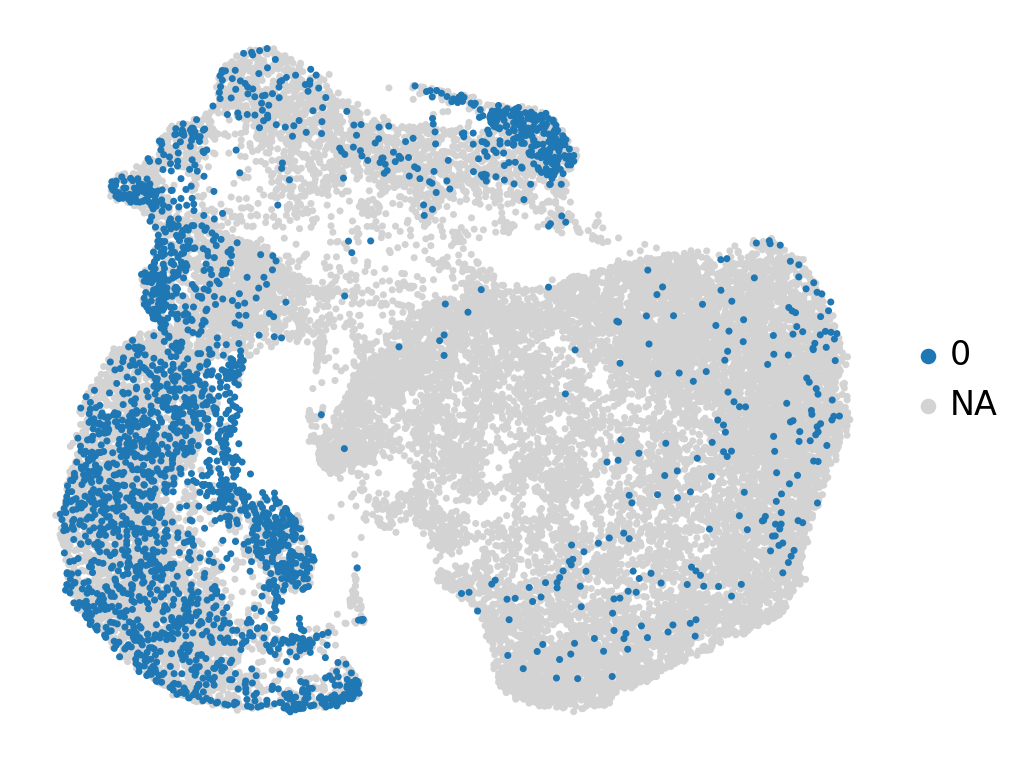

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


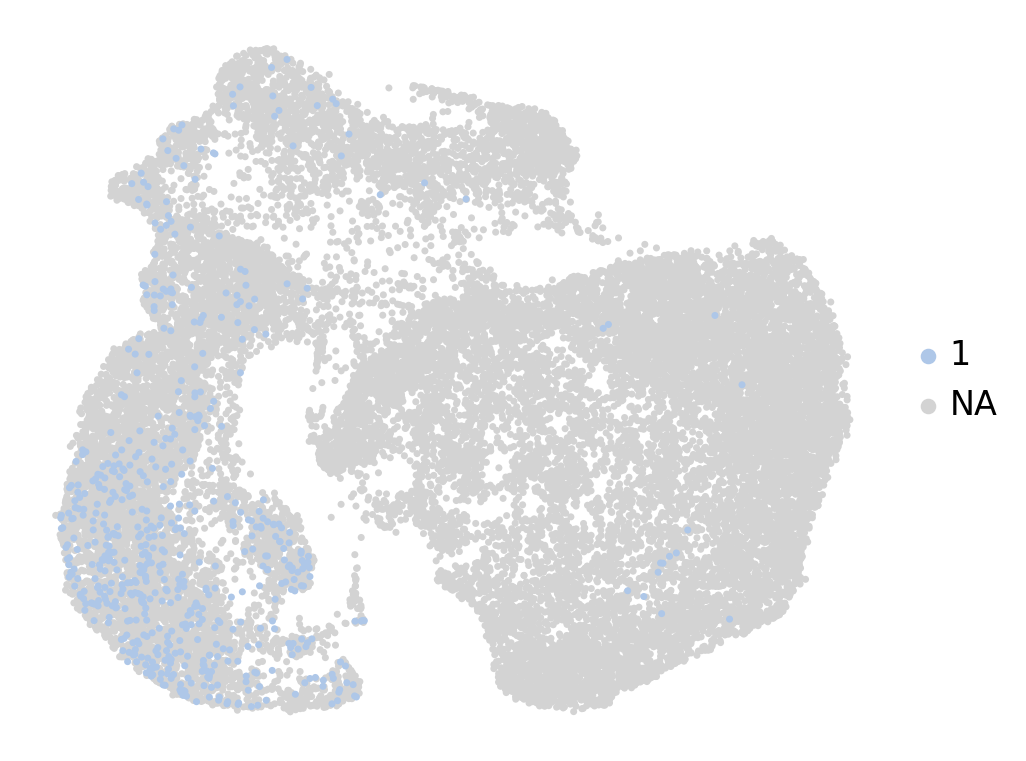

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


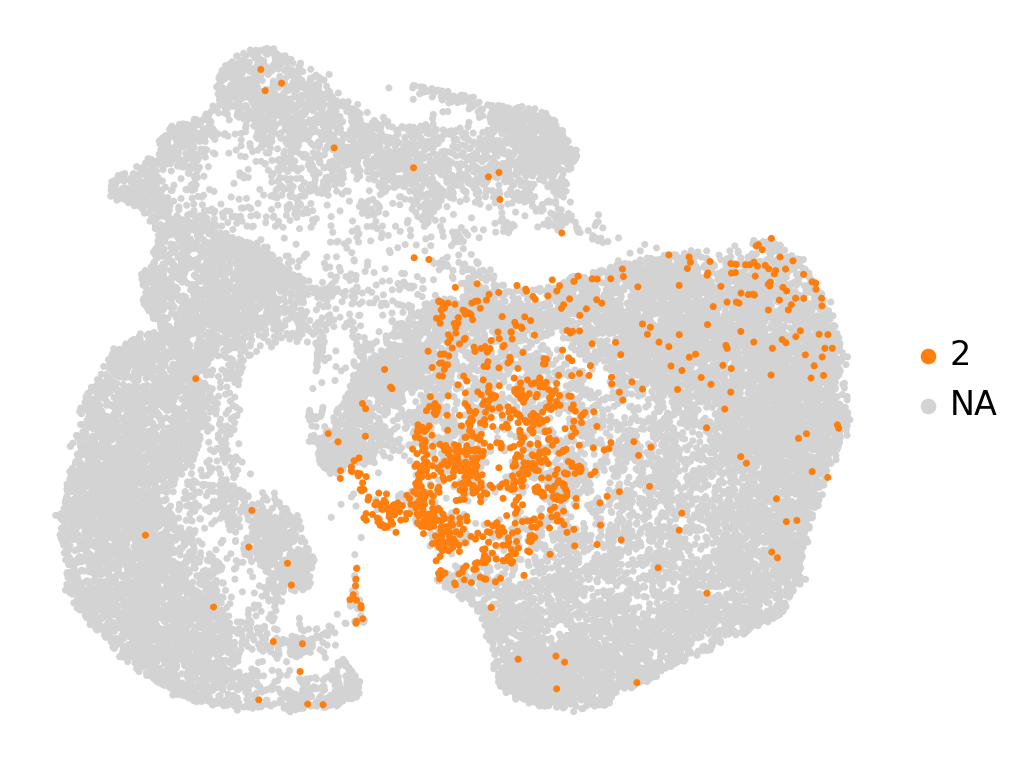

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


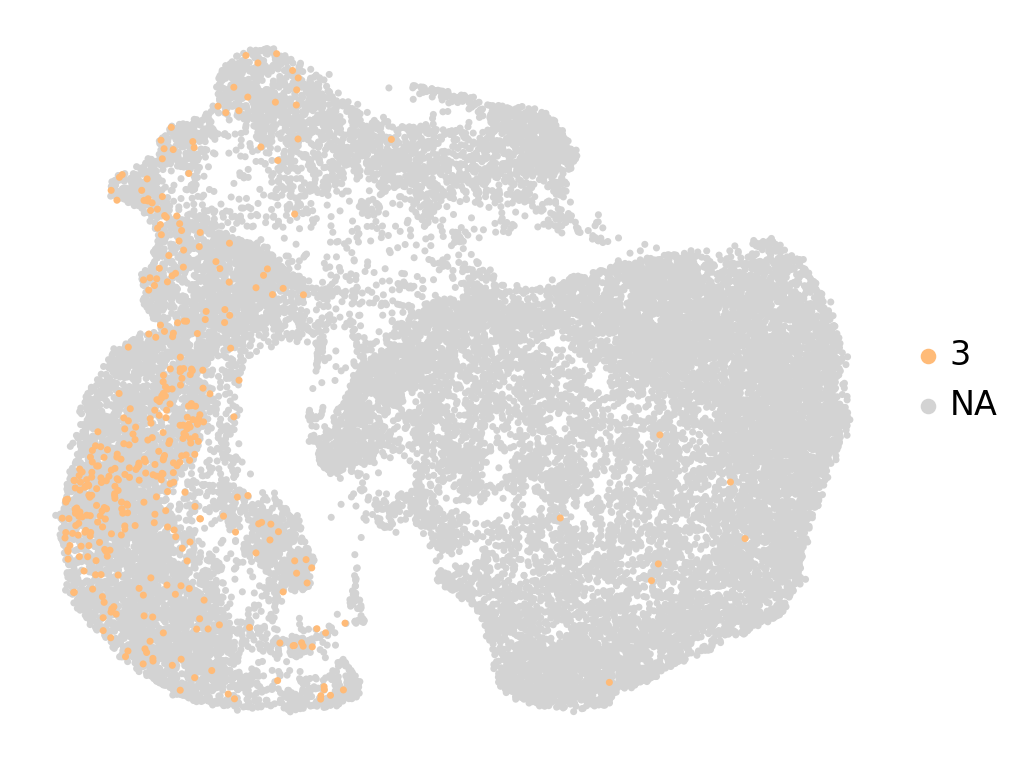

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


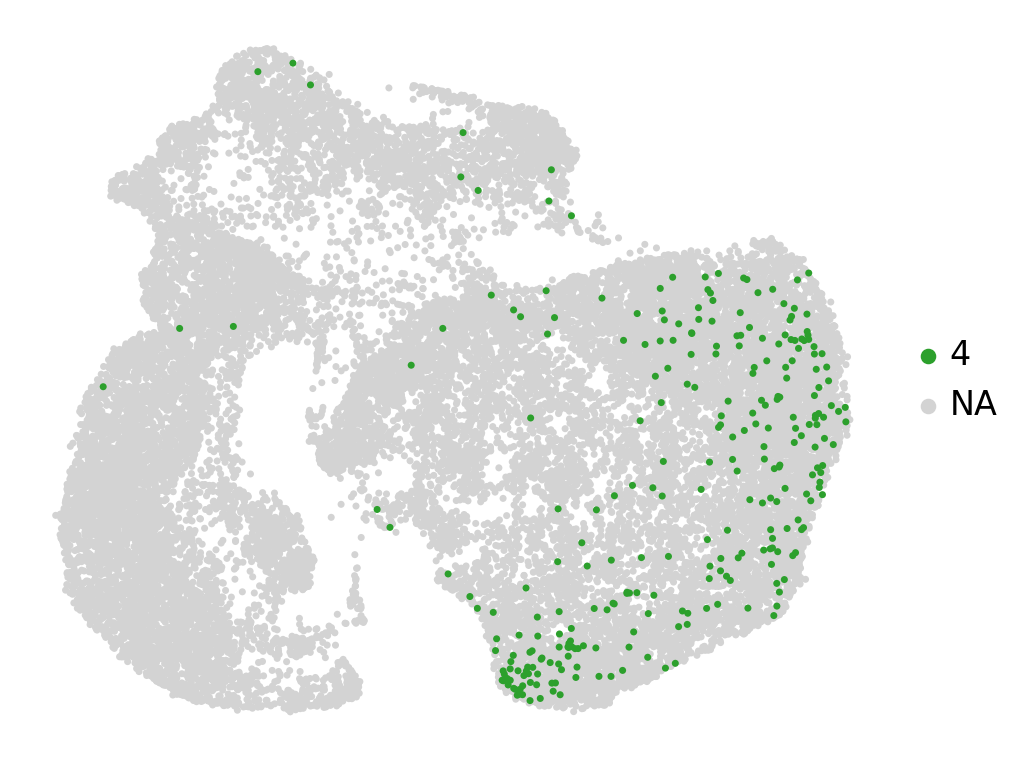

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


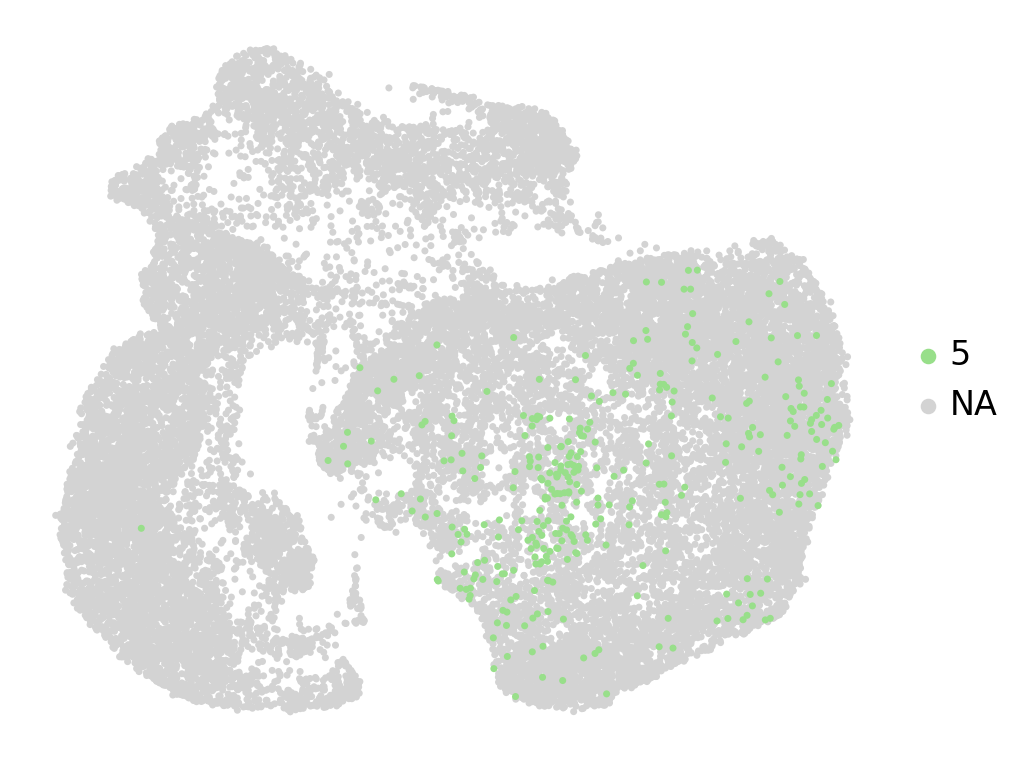

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


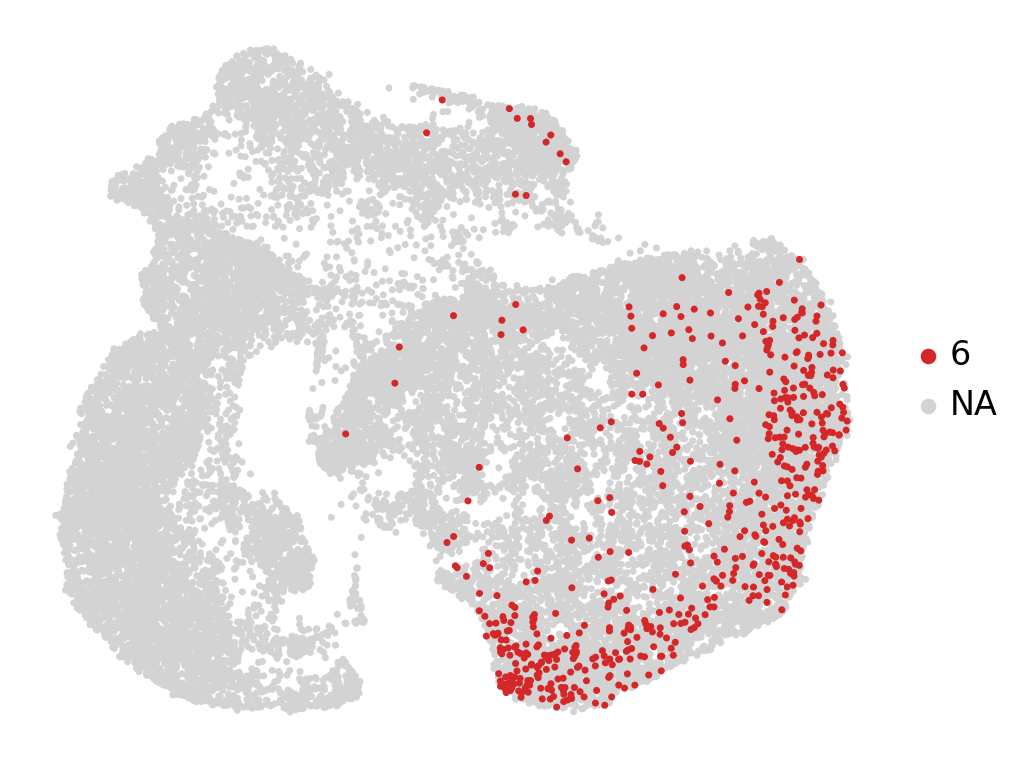

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


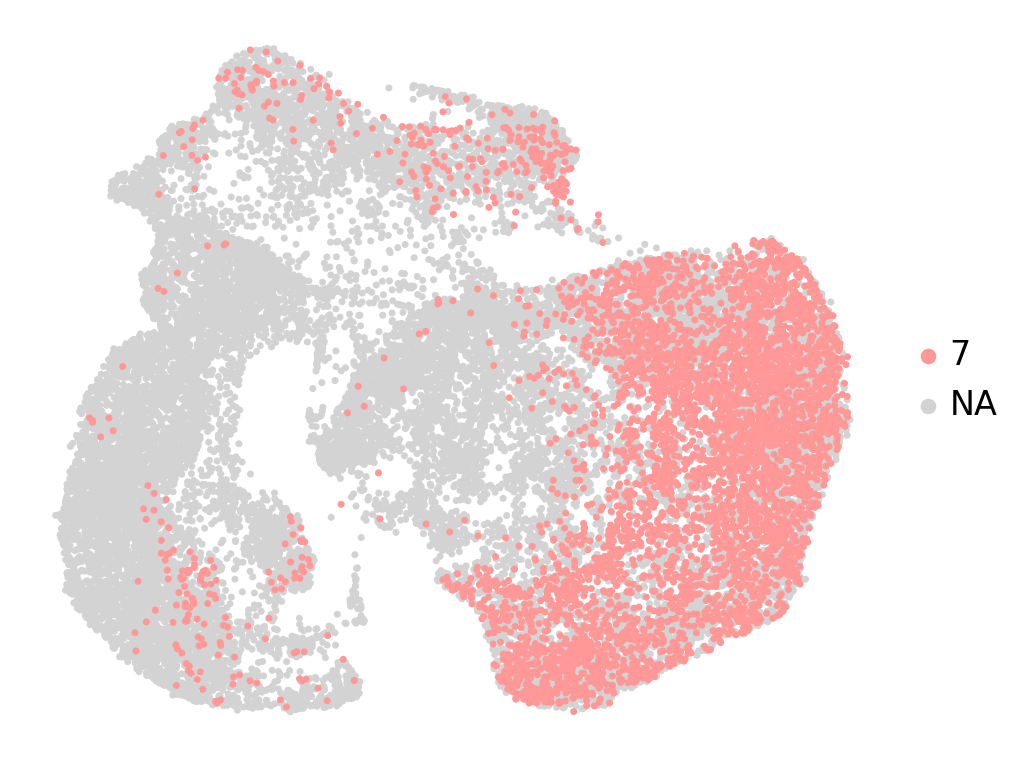

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


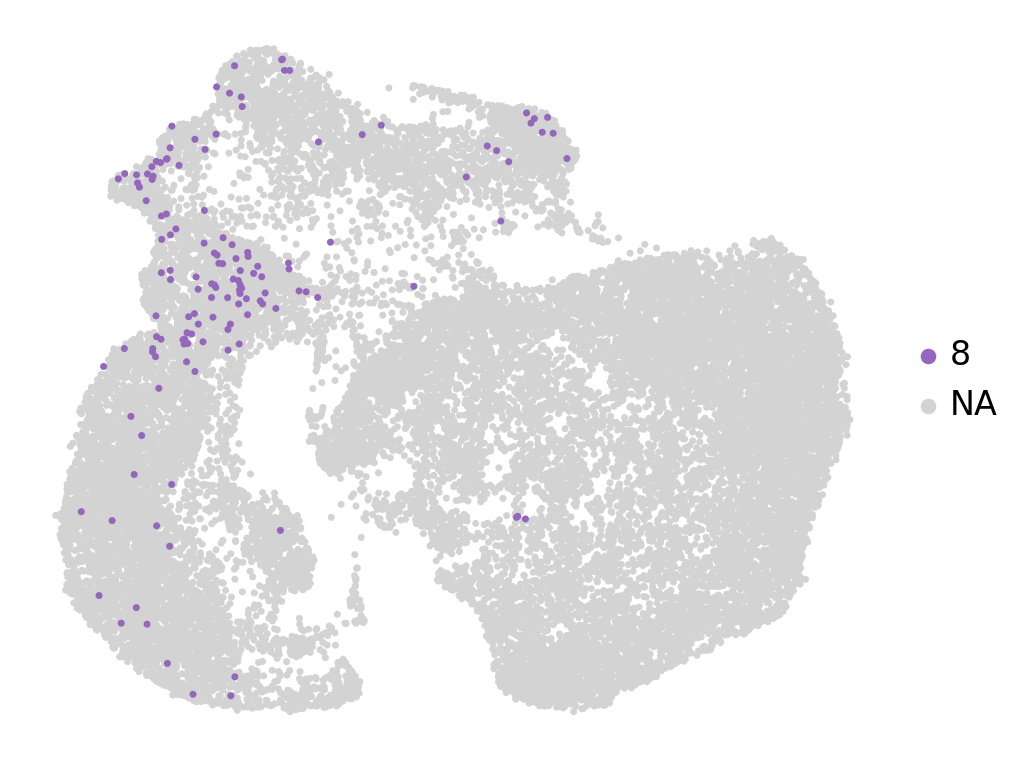

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


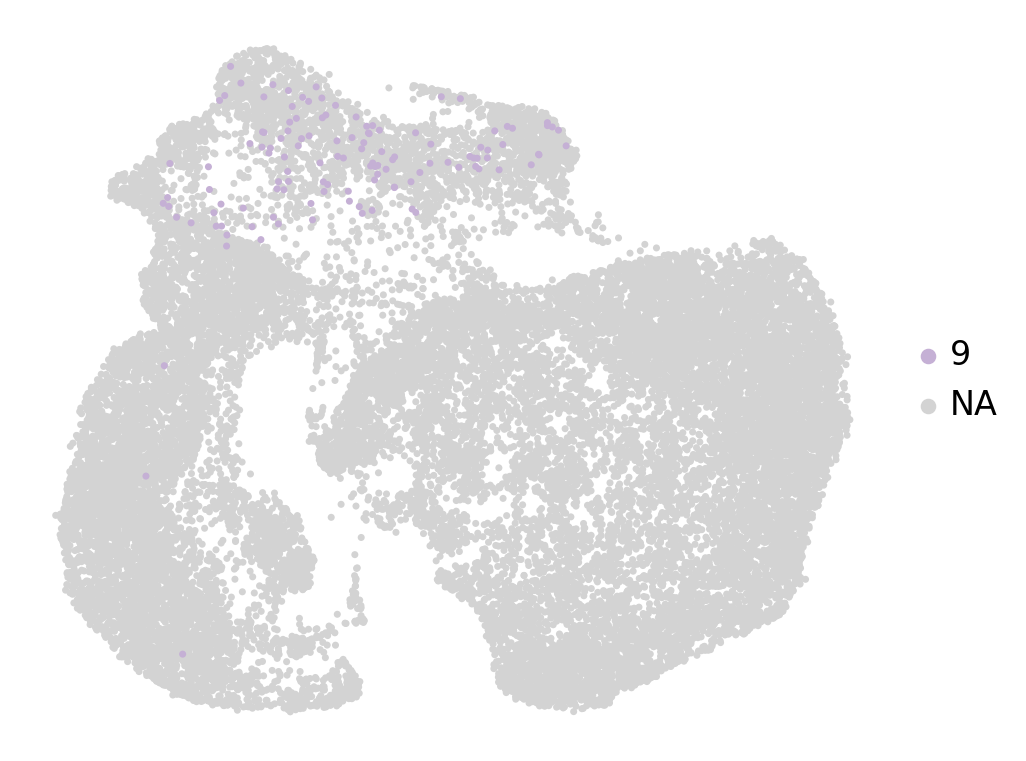

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


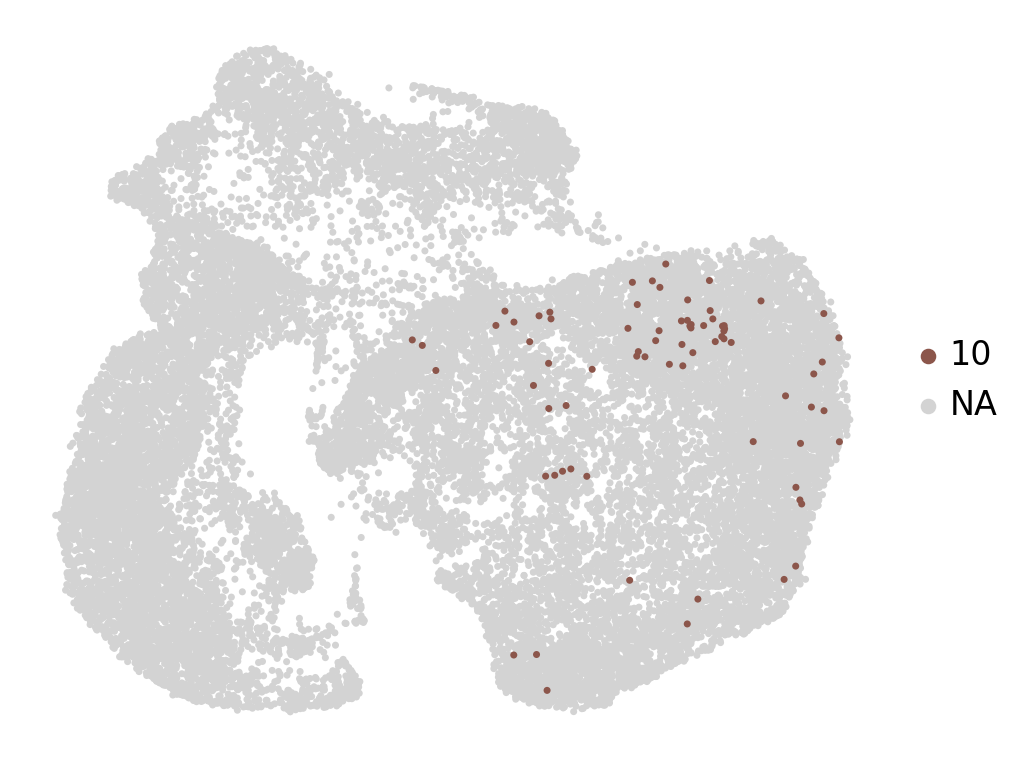

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


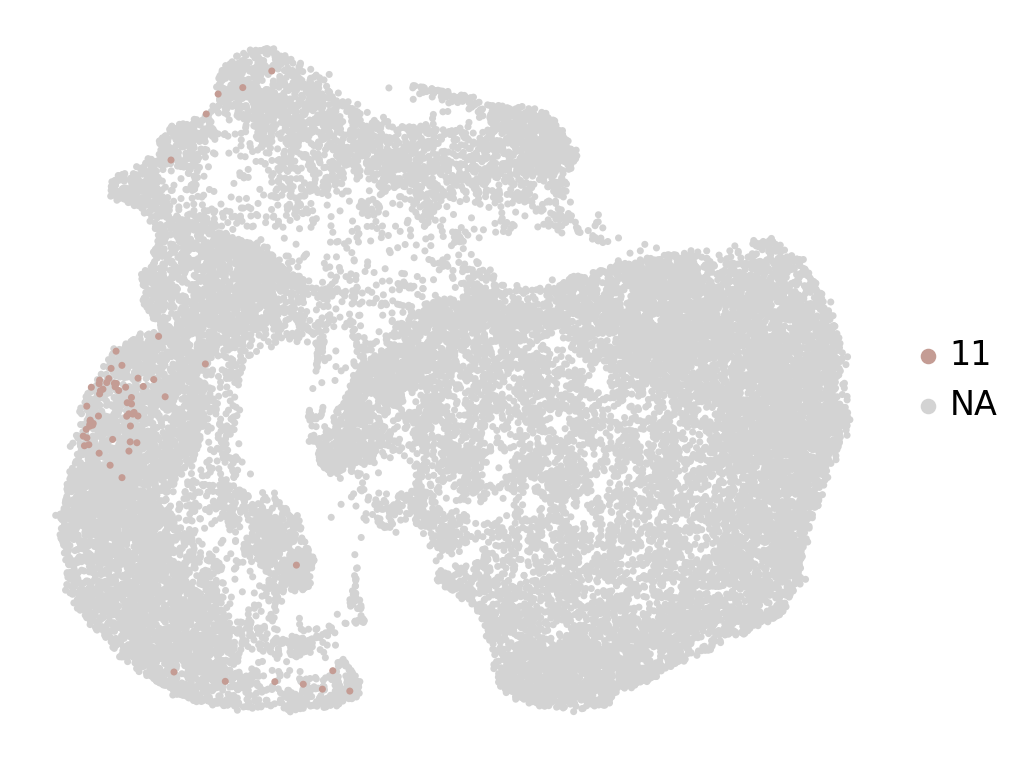

In [15]:
for label in group_labels:
    sc.set_figure_params(dpi_save=600, format='svg', figsize=(7, 6), transparent=True)
    sc.pl.umap(
        adata, color=['group'], size=40, legend_loc='right margin', 
        palette=sns.color_palette('tab20'), groups=label,
        frameon=False, title='', legend_fontsize=15, save=f'metaclones_{label}'
    )

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


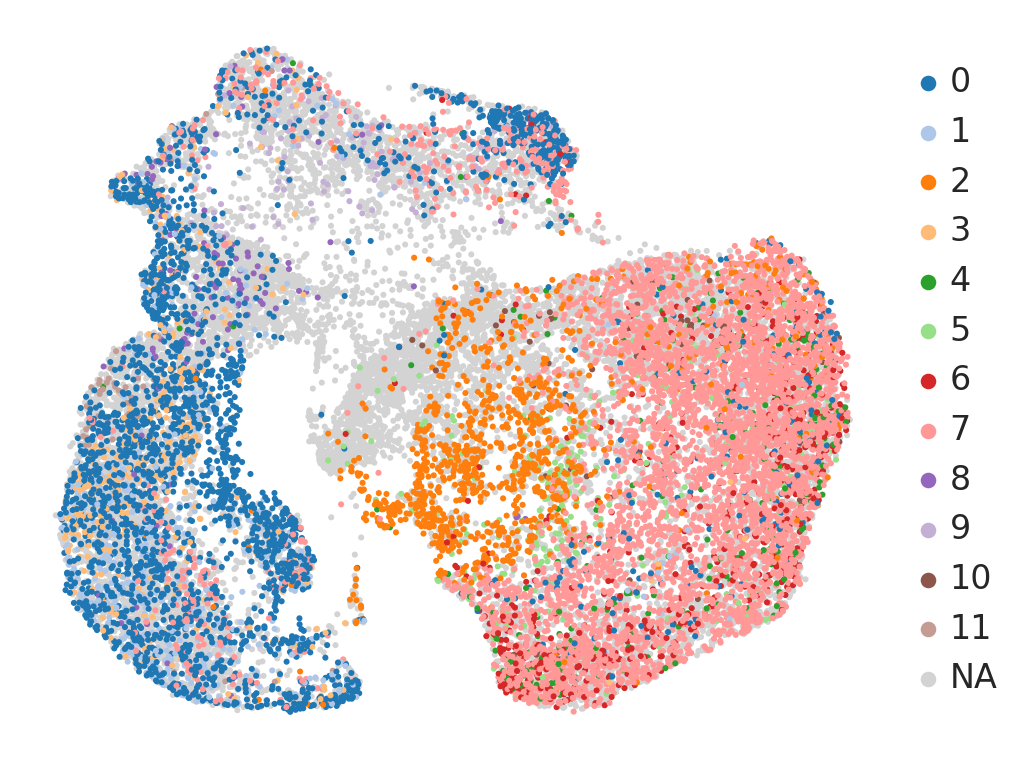

In [28]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(7, 6), transparent=True)
sc.pl.umap(
    adata, color=['group'], size=30, legend_loc='right margin', 
    palette=sns.color_palette('tab20'),
    frameon=False, title='', legend_fontsize=15, save='metaclones'
)

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


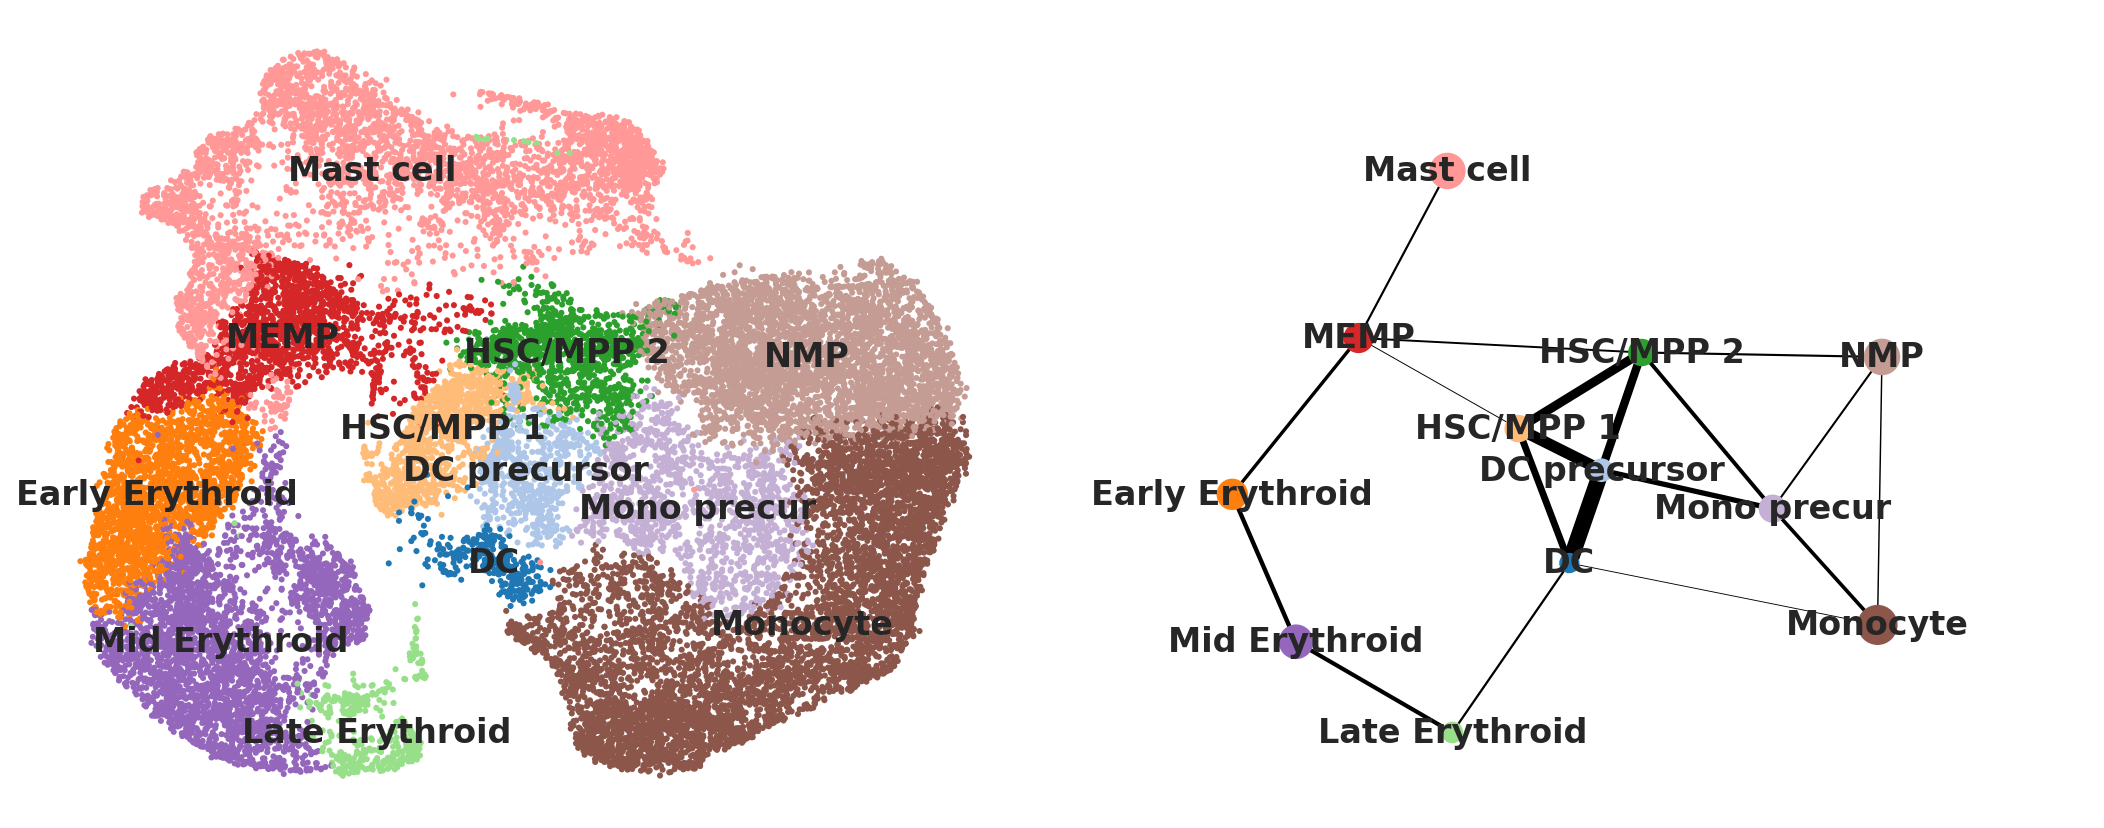

In [29]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(7, 6), transparent=True)
sc.tl.paga(adata, groups='def_lab')
sc.pl.paga_compare(
    adata, threshold = 0.05, color='def_lab',
    palette=sns.color_palette('tab20'), 
    save='.svg', size=30, frameon=False, title='',
    legend_fontsize=15
)

/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


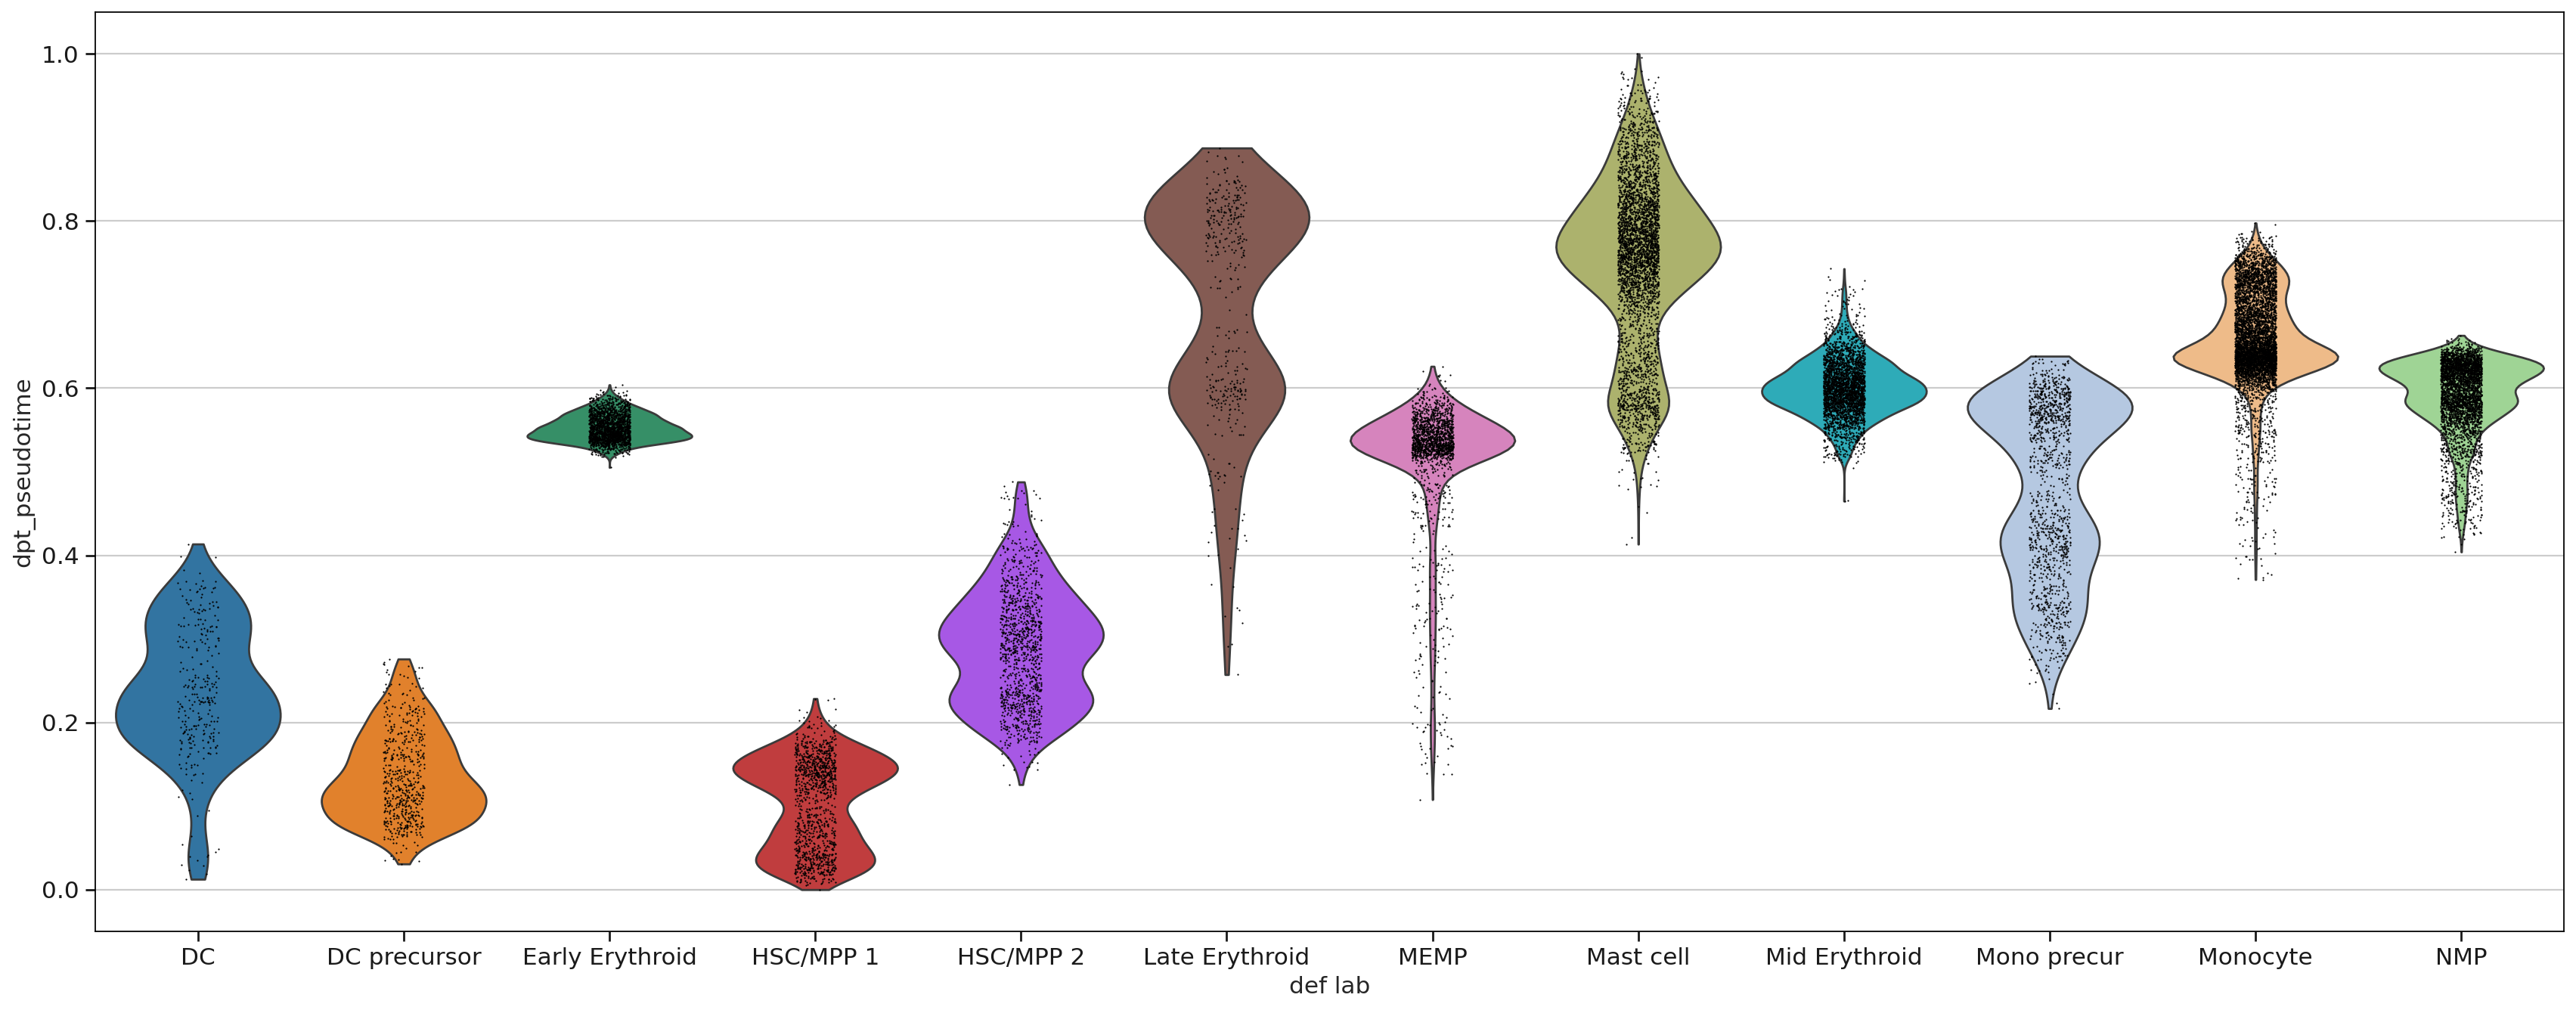

In [32]:
del adata.uns['def_lab_colors']
sc.set_figure_params(dpi_save=600, format='svg', figsize=(20, 10), transparent=True)
sc.pl.violin(adata, keys='dpt_pseudotime', groupby='def_lab')

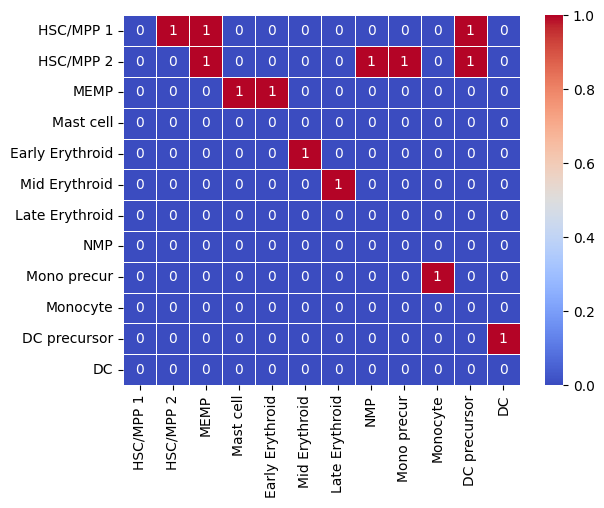

In [4]:
import seaborn as sns
import pandas as pd
anno = pd.read_csv('./data/graph_table.csv', header=0, index_col=0)
ax = sns.heatmap(anno, annot=True, linewidth=.5, cmap='coolwarm')
plt.savefig('./figures/transmap.svg', dpi=300, bbox_inches='tight', transparent=True)

### Generate model inputs

In [35]:
times = [3, 10, 17]
size_leiden = len(set(mat.obs.leiden))
size_time = len(times)
size_pops = len(set(adata_clones_filter.obs.def_lab))
print (size_leiden, size_time, size_pops)

12 3 12


In [36]:
from natsort import natsorted
leiden = natsorted(list(set(mat.obs.leiden)))
leiden

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

In [37]:
print (13284 / 2708)
print (500000 * (13284 / 4428) / 2827)
print (1764225 * (500000 / 460000) * (13284 / 4428) / 11310)

4.90546528803545
530.5978068623983
508.65672932764386


In [38]:
df = pd.DataFrame(data=mat.X, columns=list(mat.var.index), index=list(mat.obs.index))
df = df.astype('float32')
df.loc[:, df.columns.str.startswith('Day3_')] = df.loc[:, df.columns.str.startswith('Day3_')] * 13284 / 2708
df.loc[:, df.columns.str.startswith('Day10_')] = df.loc[:, df.columns.str.startswith('Day10_')] * 500000 * (13284 / 4428) / 2827
df.loc[:, df.columns.str.startswith('Day17_')] = df.loc[:, df.columns.str.startswith('Day17_')] * 1764225 * (500000 / 460000) * (13284 / 4428) / 11310
df = df.round(0)

/tmp/ipykernel_189249/3458614449.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[[   0.            0.          530.59780686 ...    0.
     0.            0.        ]
 [   0.            0.          530.59780686 ...    0.
     0.            0.        ]
 [   0.            0.         1061.19561372 ...    0.
     0.            0.        ]
 ...
 [   0.            0.          530.59780686 ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df.loc[:, df.columns.str.startswith('Day10_')] = df.loc[:, df.columns.str.startswith('Day10_')] * 500000 * (13284 / 4428) / 2827


In [39]:
kinetics = np.zeros((size_leiden + 1, size_time, size_pops), dtype=np.float32)
pops = ['HSC/MPP 1', 'HSC/MPP 2', 'MEMP', 'Mast cell', 
        'Early Erythroid', 'Mid Erythroid', 'Late Erythroid', 
        'NMP', 'Mono precur', 'Monocyte', 
        'DC precursor', 'DC'
]

for idi, leid in enumerate(leiden):
    for idj, time in enumerate(times):
        for idk, pop in enumerate(pops):
            if 'Day' + str(time) + '_' + pop in mat.var_names:
                kinetics[idi, idj, idk] = np.array(df[mat.obs.leiden == leid]['Day' + str(time) + '_' + pop].values).sum()

In [40]:
kinetics.sum()

5442561.0

In [41]:
for idj, time in enumerate(times):
    for idk, pop in enumerate(pops):
        if 'Day' + str(time) + '_' + pop in adata.obs['time_label_full'].values:
            num = adata[adata.obs['time_label_full'] == 'Day' + str(time) + '_' + pop, :].shape[0]
            if str(time) == '3':
                num *= (13284 / 2708)
            if str(time) == '10':
                num *= (500000 * (13284 / 4428) / 2827)
            if str(time) == '17':
                num *= (1764225 * (500000 / 460000) * (13284 / 4428) / 11310)
            kinetics[-1, idj, idk] = int(num)

In [42]:
kinetics.sum()

14911401.0

In [43]:
np.savetxt('./kinetics_array_correction_factor.txt', np.reshape(kinetics, (size_leiden + 1, size_time * size_pops)))

### Visualize total cell counts

In [44]:
kinetics = np.swapaxes(kinetics, 0, 1)
kinetics.shape

(3, 13, 12)

In [45]:
init_con = pd.read_csv('./data/initial_condition.csv')
day_zero = np.zeros((kinetics.shape[1], kinetics.shape[2]))
day_zero[:, 0] = init_con['leiden'].values
kinetics = np.concatenate((np.expand_dims(day_zero, axis=0), kinetics), axis=0)
kinetics.shape

(4, 13, 12)

In [46]:
kinetics[:, 7, 0]

array([ 44.,  25., 531.,   0.])

In [47]:
kinetics[:, -1, 0]

array([3246., 5474., 2122.,    0.])

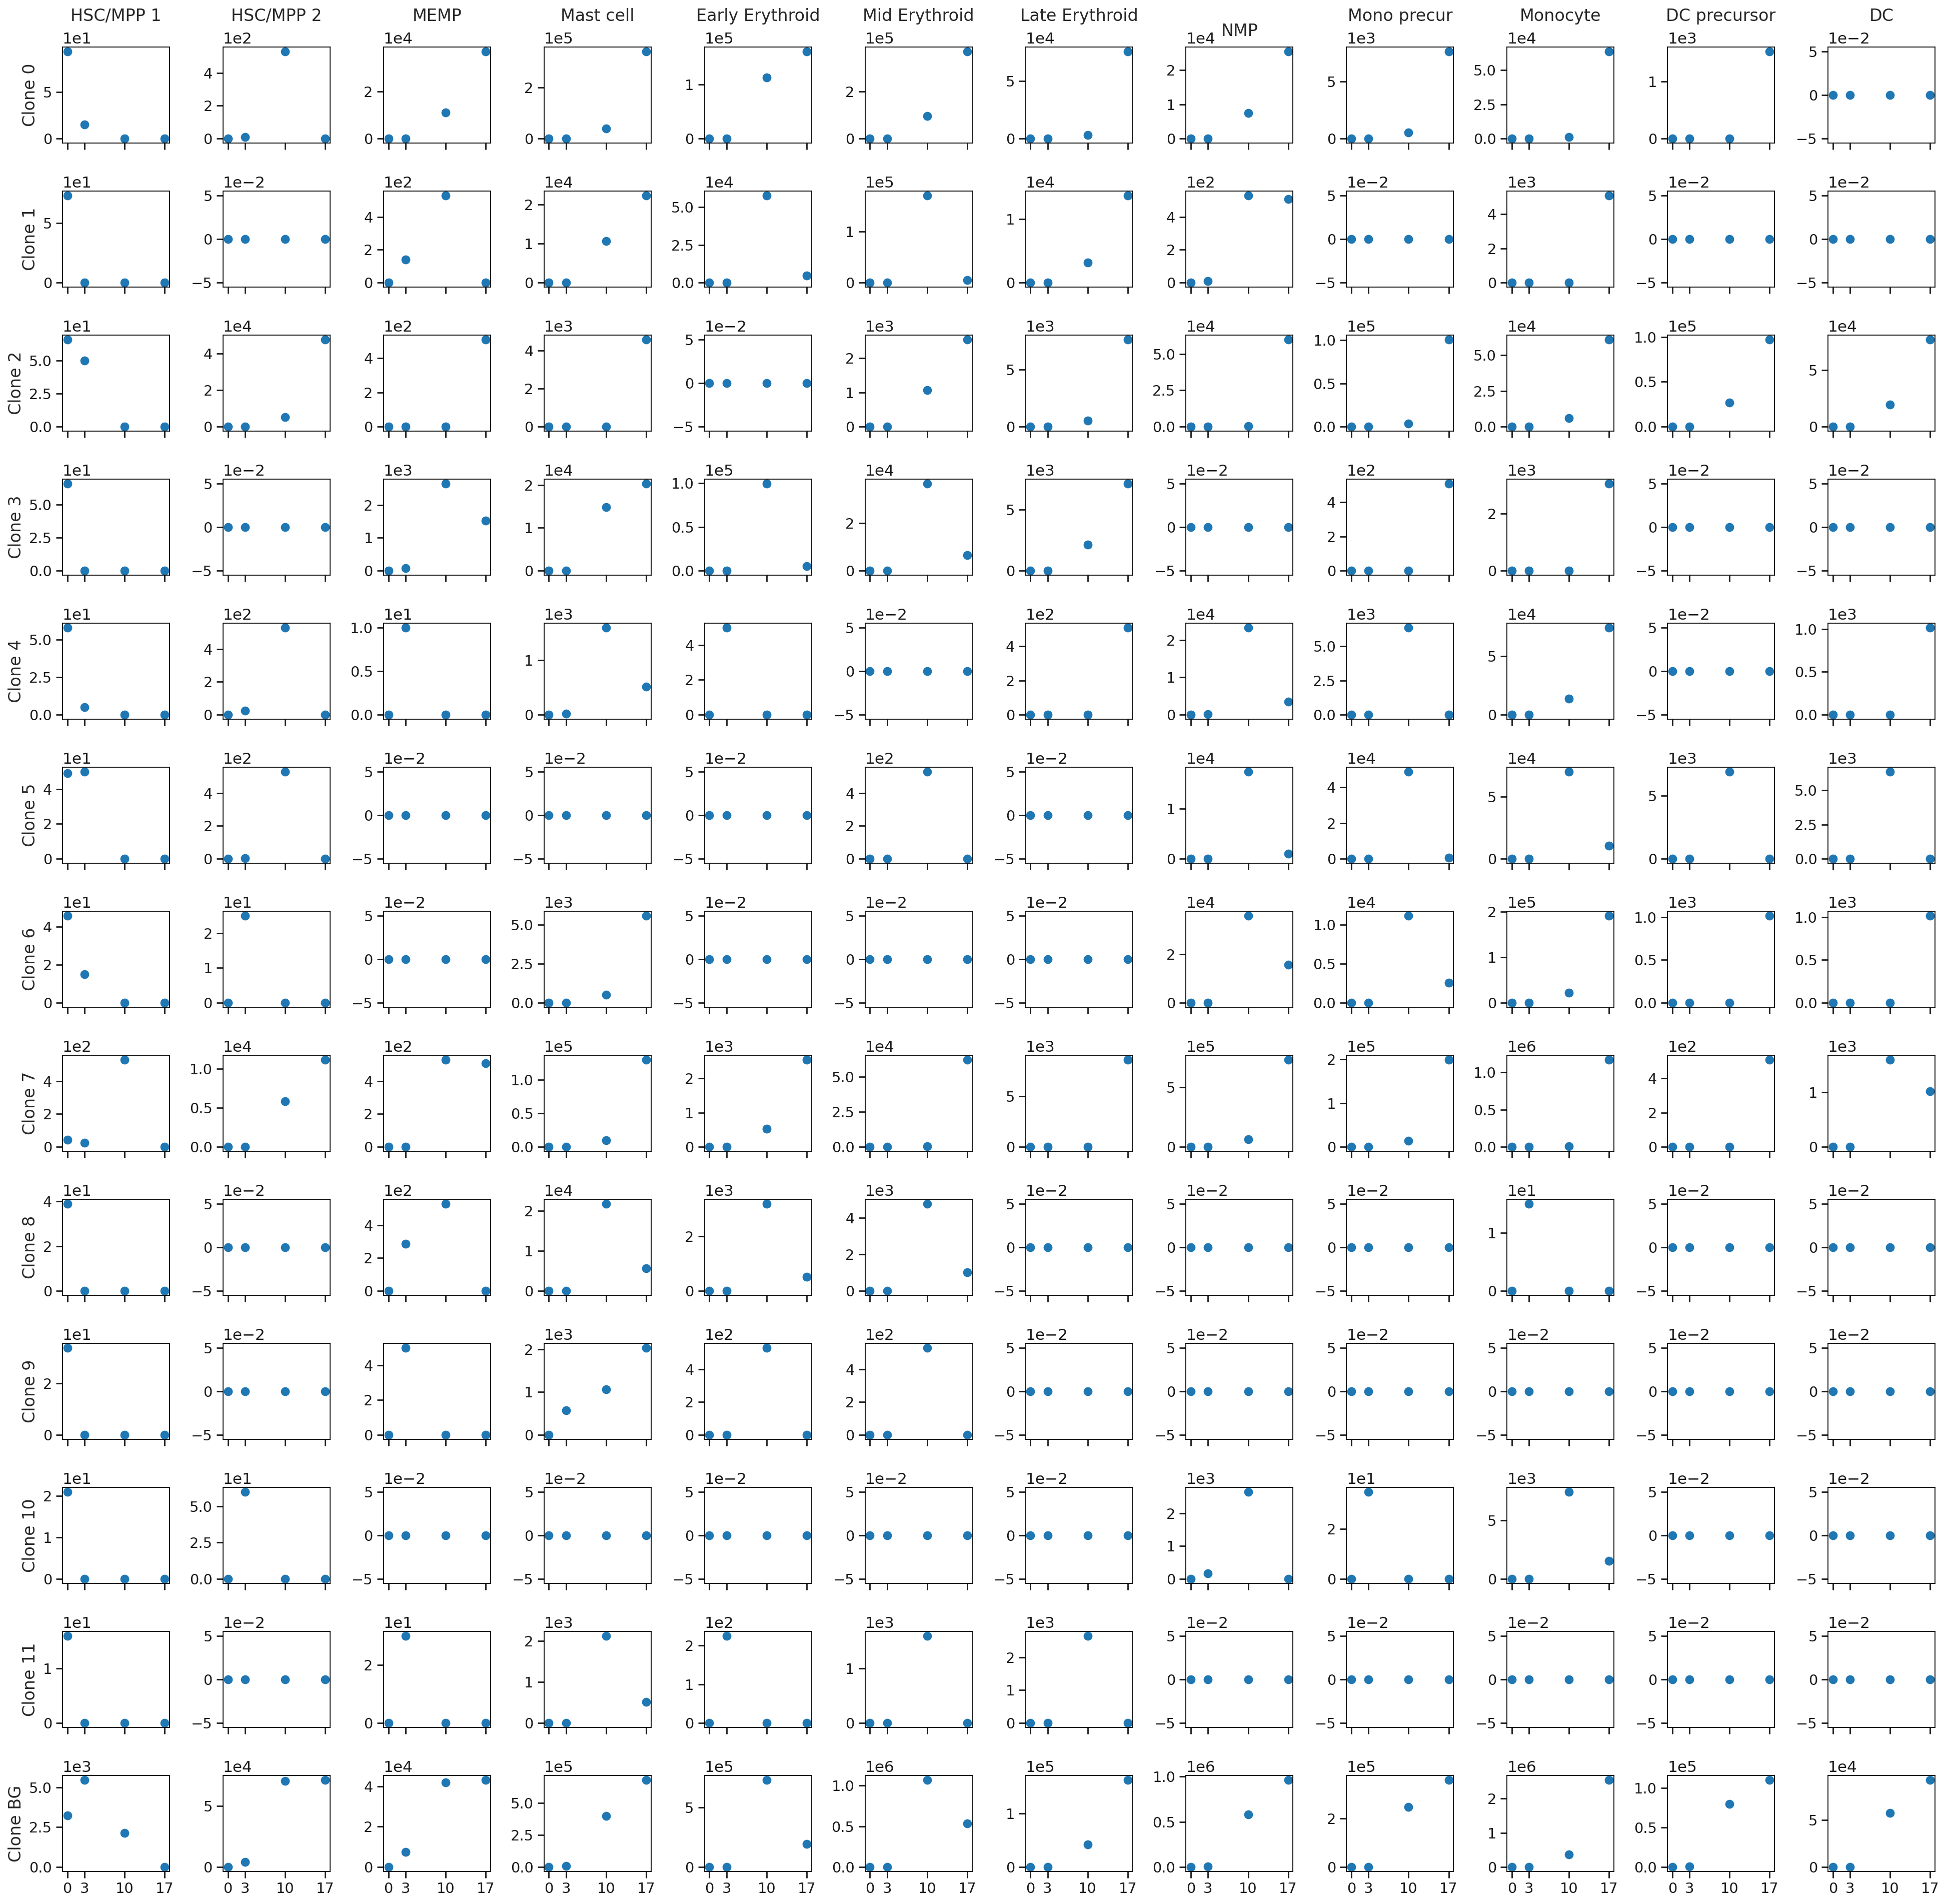

In [48]:
from itertools import product
fig, axes = plt.subplots(kinetics.shape[1], kinetics.shape[2], figsize=(30, 30), sharex=True)

anno = pd.read_csv('./data/annotations.csv')

for row, col in product(range(kinetics.shape[1]), range(kinetics.shape[2])):
    axes[row][col].plot(
        [0, 3, 10, 17], 
        kinetics[:, row, col], 
        marker='o',
        linestyle='',
        markersize=7
    )

    axes[0][col].set_title(anno['populations'][col], fontsize=15, pad=10)
    axes[row][0].set_ylabel(anno['clones'][row], fontsize=15)
    axes[row][col].set_xticks([0, 3, 10, 17])
    axes[row][col].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axes[row][col].tick_params(axis='both', labelsize=13)
    axes[row][col].grid(visible=False)

fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)

plt.savefig(f'./cellcounts_scale.png', dpi=600, bbox_inches='tight', transparent=True)